<a href="https://colab.research.google.com/github/MoreenMarutaData/WATER-ANALYSIS-PROJECT-WEEK-5-CORE-IP/blob/main/GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WATER HYPOTHESIS PROJECT PYTHON NOTEBOOK**

# 1.Toolbox

> Contains loaded libraries and functions that will help in our data analysis

#### Libraries

In [ ]:
# load the libraries for data analysis and visualizations.
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#define plot size for all plots
plt.rcParams['figure.figsize'] = [15, 8]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Functions

In [ ]:
# check percentage of null values on each column
def perc_missing(data):
  # tot sum of missing values
  sum_missing = data.isnull().sum().sort_values(ascending=False)

  #percentage of the total
  perc_total = (data.isnull().sum() / len(data)).sort_values(ascending=False)

  missing_values = pd.DataFrame(
      {
          "TOTAL MISSING": sum_missing,
          "PERCANTAGE":perc_total
      }
  )

  return missing_values

In [ ]:
# check for duplicated values
def dup_check(df):
    # checking for sum of null values
    df = df.duplicated()
    df = pd.DataFrame({"Duplicated": df})
    check = df['Duplicated'].unique()
    return check

In [ ]:
# load data from url
def load_url(url):
  url1='https://drive.google.com/uc?id=' + url.split('/')[-2]
  tot_pop__county =pd.read_excel(url1)
  df = tot_pop__county.copy()

  return df

def load_url_csv(url):
  url1='https://drive.google.com/uc?id=' + url.split('/')[-2]
  tot_pop__county =pd.read_csv(url1)
  df = tot_pop__county.copy()

  return df

In [ ]:
# we remove the unwanted row, and null values and reset the index 
def pop_cleaner(data):
  data = data[3:95]
  data = data.dropna()

  # renaming non numerical values. 
  data = data.replace(['n.c.d.'], ['0'])
  data = data.replace(['n.d.'], ['0'])

  data = data.reset_index(drop=True)

  return data
 

In [ ]:
# drop columns and convert data types
def drop_conn_pop(data):
  # drop columns
  # Using the operator .loc[] to
  # select all the rows with 
  # some particular columns
  #result = data.loc[:, ['COUNTY', 'Total Population in Service Area', 'Total PopulationServed', 'Production per capita (l/c/d)', 'Consumption per capita (l/c/d)','Non-Revenue Water (%)']]
  result = pd.DataFrame(data)
  result = result.iloc[:, [0, 1,2,10,11,12]]
  
  # convert data type
  result['Total Population in Service Area'] = result['Total Population in Service Area'].astype(float)
  result[ 'Total PopulationServed'] = result[ 'Total PopulationServed'].astype(float)
  result['Non-Revenue Water (%)'] = result['Non-Revenue Water (%)'].astype(float)
  result['Production per capita (l/c/d)'] = result['Production per capita (l/c/d)'].astype(float)
  result['Consumption per capita (l/c/d)']= result['Consumption per capita (l/c/d)'].astype(float)

  return result


In [ ]:
# drop and reset index
def wtr_test_cleaner(data):
  
  # drop null values
  data = data.dropna()

  # drop columns
  data = data.iloc[:, [1,2,3,4,5,6,8]]

  # convert data
  data['DATE']= pd.to_datetime(data['DATE'])

  data.rename(columns = {'counties':'COUNTY'}, inplace = True)

  data = data.reset_index(drop=True)

  return data

In [ ]:
# drop and reset index
def perc_cleaner(data):
  
  # drop columns
  data = data.iloc[:, [1,2]]

  return data

In [ ]:
# filter
def hse_cleaner(data):
  # drop columns
  data = data.iloc[:, [1,2]]
  data.rename(columns = {'CountyName':'COUNTY'}, inplace = True)
  return data


In [ ]:
# Converting to list then converting to getting uppercase
def converter():
  counties = """Mombasa Kwale Kilifi Tana_River Lamu Taita_Taveta Garissa Wajir Mandera Marsabit Isiolo Meru Tharaka-Nithi Embu Kitui Machakos Makueni Nyandarua Nyeri Kirinyaga Muranga Kiambu Turkana West_Pokot Samburu Trans_Nzoia Uasin_Gishu Elgeyo_Marakwet Nandi Baringo Laikipia Nakuru Narok Kajiado Kericho Bomet Kakamega Vihiga Bungoma Busia Siaya Kisumu Homa_Bay Migori Kisii Nyamira Nairobi"""
  x = counties.split()

  county_names = x.copy()
  counties_upper = [i.upper() for i in county_names]
  return counties_upper
  

In [ ]:
# Changing the common column to uppercase

def uppercase(data):
  
  data['COUNTY'] = data['COUNTY'].apply(lambda x: x.upper())
  
  return data

In [ ]:
# checks for data that is in 
def select_counties(data):
  m = converter()
  county_m = data['COUNTY'].isin(m)
  data = data[county_m]
  return data

In [ ]:
# Visualization for bivariate analysis
def bivariate_viz(data,variable_1,variable_2,palette):
  data = data.nunique
  bi_data = data.groupby([variable_1,variable_2])[variable_2].count()
  output = pd.DataFrame(bi_data)
  df = output.rename(columns={f"{variable_2}":'Count'}).reset_index()
  sns.set_style("whitegrid")
  ax,bar = plt.subplots(figsize = (12,10))
  ax=sns.barplot(x=f"{variable_1}",y='Count',hue=f"{variable_2}", data=df,palette=palette)

  plt.show()
  return

In [ ]:
# Exports data to a csv file
def export(data, name):
  file_name = name+".csv"
  
  return data.to_csv(file_name, encoding = 'utf-8')

In [ ]:
# Removes outliers in particular columns
def Remove_Outlier(Df,col_name):
    q1 = Df[col_name].quantile(0.25)
    q3 = Df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_bound  = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    df_out = Df.loc[(Df[col_name] > lower_bound) & (Df[col_name] < upper_bound)]
    Df=df_out
    return Df

# 2.0 EXPLORATORY DATA ANALYSIS


### 2.1 DATA LOADING

### ================= OUR DATA SETS ARE AS FOLLOWS ================
> A. Total population by county data set

> B. Kewi water test 

> C. Percentage of population with access to improved water facilities in Kenya
 
> D. Households paying for the water they use in Kenya


In [ ]:
# A. Total population by county data set
url_pop = "https://docs.google.com/spreadsheets/d/1od0UZRRt5zVu99sST4Z6UVB3lgLO1y73/edit?usp=sharing&ouid=110944716173638851442&rtpof=true&sd=true"
df_pop = load_url(url_pop)

df_pop.head()

,Table 3.1 presents general data for these 88 utilities that have a bearing on their performance.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Table 3.1: General Data on Utilities 2016/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UTILITY,Total Population in Service Area,Total PopulationServed,Total no. of connections (active+inactive),Total No.Active Connections,No. of towns served,Turnover (KSh million),Total Water Produced in m3 (000),Domestic + Kiosks billed volume in m3 (000),Total billed volume in m3 (000),Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d),No Of Total Staff,Validity of Tariff as at June 2017
2,"Very Large (≥35,000 conns.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nairobi,4249604,3426434,604649,582502,1,9603,181364,61973,112819,38,145,50,3511,Valid
4,Eldoret,436004,321165,116355,87064,2,741,13359,6206,7604,43,114,53,325,Valid


In [ ]:
# B. Kewi water test

# Uploading the already downloaded data then loading it
kewi_water = pd.read_excel('/content/kewi-water-test-and-results.xlsx')

df_water_test = kewi_water.copy()

# viewing the dataset
df_water_test.head()

,SAMPLE_NO,DATE,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,CONDUCTIVITY?S/cm,Total_Dissolved_Solids,COLOUR,OBJECTID
0,672,2011-12-20 00:00:00,Effluent,Machakos,Effluent,7.60,NaN,NaN,NaN,NaN,0
1,684,2012-01-25 00:00:00,Borehole,Nairobi,PH/Nitirites/Fluoride/Iron/Manganese,7.78,NaN,433.0,3.0,NaN,1
2,685,2012-01-11 00:00:00,Effluent,Machakos,NaN,NaN,NaN,21300.0,15.0,NaN,2
3,686,2012-01-11 00:00:00,Effluent,Machakos,Effluent,NaN,NaN,18840.0,125.0,NaN,3
4,687,2012-01-30 00:00:00,Rain,Kitui,Full Chemical Analysis/Bacteriological Analysis,6.40,8.0,NaN,NaN,NaN,4


In [ ]:
# C. Percentage of population with access to improved water facilities in Kenya

# Loading the dataset from shared drive folder
url_percentages="https://drive.google.com/file/d/1hFw0eJeTmEhTsWEMooiZ6MMw_a5ME30B/view?usp=sharing"


Percentage_with_access = load_url_csv(url_percentages)

df_perc_access_wtr  = Percentage_with_access.copy()

#viewing the dataset
df_perc_access_wtr.head()

,Country,Counties,Improved water source (% of population with access)
0,Kenya,National Average,66.5
1,Kenya,Baringo,35.1
2,Kenya,Bomet,40.8
3,Kenya,Bungoma,88.9
4,Kenya,Busia,82.9


In [ ]:
# D. Households paying for the water they use in Kenya

# Loading the dataset from shared drive folder
url_households="https://drive.google.com/file/d/10CCEfVtkdu6DPcJ9qW7YIcj_ANp-hiY_/view?usp=sharing"



paying_households=load_url_csv(url_households)


df_hse_pyng_water = paying_households.copy()

# Viewing the dataset
df_hse_pyng_water.head()

,CountyID,CountyName,WaterPaid,SmpSrc,SmpDUs,TotDUs,PcntUsingSrc,NoUsingSrc,Unnamed: 8
0,1,NAIROBI,No,1337,23373,720300,5.72,41203,NaN
1,1,NAIROBI,Sometimes,3,23373,720300,0.01,92,NaN
2,1,NAIROBI,Yes,22033,23373,720300,94.27,679004,NaN
3,10,MANDERA,Yes,646,676,4597,95.56,4393,NaN
4,10,MANDERA,No,30,676,4597,4.44,204,NaN


## 2.2 DATA CLEANING

---------------- OUR LOADED DATASETS ARE  ---------------
1. df_pop
2. df_water_test
3. df_perc_access_wtr
4. df_hse_pyng_water


### Population Data

In [ ]:
df_pop.head()

,Table 3.1 presents general data for these 88 utilities that have a bearing on their performance.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Table 3.1: General Data on Utilities 2016/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UTILITY,Total Population in Service Area,Total PopulationServed,Total no. of connections (active+inactive),Total No.Active Connections,No. of towns served,Turnover (KSh million),Total Water Produced in m3 (000),Domestic + Kiosks billed volume in m3 (000),Total billed volume in m3 (000),Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d),No Of Total Staff,Validity of Tariff as at June 2017
2,"Very Large (≥35,000 conns.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nairobi,4249604,3426434,604649,582502,1,9603,181364,61973,112819,38,145,50,3511,Valid
4,Eldoret,436004,321165,116355,87064,2,741,13359,6206,7604,43,114,53,325,Valid


In [ ]:
# check columns
df_pop.columns

Index(['Table 3.1 presents general data for these 88 utilities that have a bearing on their performance.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [ ]:
# Let us now first rename our columns
column_names=['COUNTY', 'Total Population in Service Area', 'Total PopulationServed',
       'Total no. of connections (active+inactive)',
       'Total No.Active Connections', 'No. of towns served',
       'Turnover (KSh million)', 'Total Water Produced in m3 (000)',
       'Domestic + Kiosks billed volume in m3 (000)',
       'Total billed volume in m3 (000)', 'Non-Revenue Water (%)',
       'Production per capita (l/c/d)', 'Consumption per capita (l/c/d)',
       'No Of Total Staff', 'Validity of Tariff as at June 2017']

df_pop.columns=column_names

df_pop.head()

,COUNTY,Total Population in Service Area,Total PopulationServed,Total no. of connections (active+inactive),Total No.Active Connections,No. of towns served,Turnover (KSh million),Total Water Produced in m3 (000),Domestic + Kiosks billed volume in m3 (000),Total billed volume in m3 (000),Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d),No Of Total Staff,Validity of Tariff as at June 2017
0,Table 3.1: General Data on Utilities 2016/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UTILITY,Total Population in Service Area,Total PopulationServed,Total no. of connections (active+inactive),Total No.Active Connections,No. of towns served,Turnover (KSh million),Total Water Produced in m3 (000),Domestic + Kiosks billed volume in m3 (000),Total billed volume in m3 (000),Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d),No Of Total Staff,Validity of Tariff as at June 2017
2,"Very Large (≥35,000 conns.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nairobi,4249604,3426434,604649,582502,1,9603,181364,61973,112819,38,145,50,3511,Valid
4,Eldoret,436004,321165,116355,87064,2,741,13359,6206,7604,43,114,53,325,Valid


In [ ]:
# check percentage of values missing
perc_missing(df_pop)

,TOTAL MISSING,PERCANTAGE
Validity of Tariff as at June 2017,6,0.063158
No Of Total Staff,5,0.052632
Consumption per capita (l/c/d),5,0.052632
Production per capita (l/c/d),5,0.052632
Non-Revenue Water (%),5,0.052632
Total billed volume in m3 (000),5,0.052632
Domestic + Kiosks billed volume in m3 (000),5,0.052632
Total Water Produced in m3 (000),5,0.052632
Turnover (KSh million),5,0.052632
No. of towns served,5,0.052632


In [ ]:
# check duplicated
dup_check(df_pop)

array([False])

In [ ]:
# check info 
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   COUNTY                                       95 non-null     object
 1   Total Population in Service Area             90 non-null     object
 2   Total PopulationServed                       90 non-null     object
 3   Total no. of connections (active+inactive)   90 non-null     object
 4   Total No.Active Connections                  90 non-null     object
 5   No. of towns served                          90 non-null     object
 6   Turnover (KSh million)                       90 non-null     object
 7   Total Water Produced in m3 (000)             90 non-null     object
 8   Domestic + Kiosks billed volume in m3 (000)  90 non-null     object
 9   Total billed volume in m3 (000)              90 non-null     object
 10  Non-Revenue Wate

In [ ]:
df_pop = pop_cleaner(df_pop)

df_pop.head()

,COUNTY,Total Population in Service Area,Total PopulationServed,Total no. of connections (active+inactive),Total No.Active Connections,No. of towns served,Turnover (KSh million),Total Water Produced in m3 (000),Domestic + Kiosks billed volume in m3 (000),Total billed volume in m3 (000),Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d),No Of Total Staff,Validity of Tariff as at June 2017
0,Nairobi,4249604,3426434,604649,582502,1,9603,181364,61973,112819,38,145,50,3511,Valid
1,Eldoret,436004,321165,116355,87064,2,741,13359,6206,7604,43,114,53,325,Valid
2,Mombasa,1129642,482141,79665,38030,1,712,13470,5491,6770,50,77,31,380,Expired RTA
3,Nakuru,493996,442703,57550,49986,4,831,11107,5272,7613,31,69,33,228,Expired RTA
4,Kisumu,437336,289247,53296,53222,5,641,13232,3196,7778,41,125,30,323,Valid


In [ ]:
df_pop.shape

(88, 15)

In [ ]:
df_pop.describe()

,Total Population in Service Area,Total PopulationServed,Total no. of connections (active+inactive),Total No.Active Connections,No. of towns served,No Of Total Staff
count,8.800000e+01,8.800000e+01,88.000000,88.000000,88.000000,88.000000
mean,2.481641e+05,1.372131e+05,21903.113636,17909.965909,1.522727,124.397727
std,4.761317e+05,3.702408e+05,65414.917269,62506.520168,1.250078,372.472711
min,6.826000e+03,2.813000e+03,307.000000,307.000000,1.000000,9.000000
25%,7.342700e+04,2.401650e+04,3986.750000,2671.000000,1.000000,33.000000
50%,1.552415e+05,6.725300e+04,9255.500000,7284.500000,1.000000,63.500000
75%,2.732485e+05,1.320652e+05,19070.250000,14082.500000,1.000000,118.000000
max,4.249604e+06,3.426434e+06,604649.000000,582502.000000,7.000000,3511.000000


In [ ]:
df_pop.dtypes

COUNTY                                         object
Total Population in Service Area                int64
Total PopulationServed                          int64
Total no. of connections (active+inactive)      int64
Total No.Active Connections                     int64
No. of towns served                             int64
Turnover (KSh million)                         object
Total Water Produced in m3 (000)               object
Domestic + Kiosks billed volume in m3 (000)    object
Total billed volume in m3 (000)                object
Non-Revenue Water (%)                          object
Production per capita (l/c/d)                  object
Consumption per capita (l/c/d)                 object
No Of Total Staff                               int64
Validity of Tariff as at June 2017             object
dtype: object

In [ ]:
len(df_pop.columns)

15

In [ ]:
df_pop = drop_conn_pop(df_pop)

In [ ]:
df_pop.head()

,COUNTY,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d)
0,Nairobi,4249604.0,3426434.0,38.0,145.0,50.0
1,Eldoret,436004.0,321165.0,43.0,114.0,53.0
2,Mombasa,1129642.0,482141.0,50.0,77.0,31.0
3,Nakuru,493996.0,442703.0,31.0,69.0,33.0
4,Kisumu,437336.0,289247.0,41.0,125.0,30.0


In [ ]:
perc_missing(df_pop)

,TOTAL MISSING,PERCANTAGE
Consumption per capita (l/c/d),0,0.0
Production per capita (l/c/d),0,0.0
Non-Revenue Water (%),0,0.0
Total PopulationServed,0,0.0
Total Population in Service Area,0,0.0
COUNTY,0,0.0


In [ ]:
# exporting the dataframe as a csv
export(df_pop,'Population_Data')


### KEWI WATER TEST DATA

In [ ]:
df_water_test.head()

,SAMPLE_NO,DATE,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,CONDUCTIVITY?S/cm,Total_Dissolved_Solids,COLOUR,OBJECTID
0,672,2011-12-20 00:00:00,Effluent,Machakos,Effluent,7.60,NaN,NaN,NaN,NaN,0
1,684,2012-01-25 00:00:00,Borehole,Nairobi,PH/Nitirites/Fluoride/Iron/Manganese,7.78,NaN,433.0,3.0,NaN,1
2,685,2012-01-11 00:00:00,Effluent,Machakos,NaN,NaN,NaN,21300.0,15.0,NaN,2
3,686,2012-01-11 00:00:00,Effluent,Machakos,Effluent,NaN,NaN,18840.0,125.0,NaN,3
4,687,2012-01-30 00:00:00,Rain,Kitui,Full Chemical Analysis/Bacteriological Analysis,6.40,8.0,NaN,NaN,NaN,4


In [ ]:
# check percent missing data
perc_missing(df_water_test)

,TOTAL MISSING,PERCANTAGE
ALKALINITY_Mg/L,101,0.204868
COLOUR,84,0.170385
CONDUCTIVITY?S/cm,77,0.156187
Total_Dissolved_Solids,63,0.127789
PH,60,0.121704
TYPE_OF_H2O,22,0.044625
TYPE_OF_ANALYSIS,14,0.028398
COUNTY,11,0.022312
DATE,11,0.022312
OBJECTID,0,0.000000


In [ ]:
dup_check(df_water_test)

array([False])

In [ ]:
# clean our data
df_water_test = wtr_test_cleaner(df_water_test)

perc_missing(df_water_test)

,TOTAL MISSING,PERCANTAGE
Total_Dissolved_Solids,0,0.0
ALKALINITY_Mg/L,0,0.0
PH,0,0.0
TYPE_OF_ANALYSIS,0,0.0
COUNTY,0,0.0
TYPE_OF_H2O,0,0.0
DATE,0,0.0


In [ ]:
# Dropping the date column
df_water_test = df_water_test.drop(columns=['DATE'])
df_water_test

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids
0,Effluent,Machakos,Effluent,7.16,1300.0,18401.0
1,Effluent,Machakos,Effluent,7.20,1500.0,11507.0
2,Borehole,Mogadishu,Full Chemical Analysis,7.78,236.0,1729.8
3,River,Central,Full Chemical Analysis,8.00,98.0,201.5
4,Borehole,Lokichoggio,Full Chemical Analysis,7.08,256.0,469.0
...,...,...,...,...,...,...
275,Borehole,Nairobi,Full Chemical Analysis,5.80,12.0,1520.0
276,Borehole,Kajiado,Full Chemical Analysis,8.80,34.0,2720.0
277,Borehole,Kisii,Full Chemical Analysis,7.10,69.0,2450.0
278,Borehole,Kajiado,Full Chemical Analysis,7.30,131.0,5001.0


In [ ]:
df_water_test.describe()

,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids
count,280.000000,280.000000,280.000000
mean,7.295786,679.533571,3921.754464
std,0.854169,2923.288089,11227.918984
min,4.630000,1.400000,1.340000
25%,6.765000,41.500000,223.855000
50%,7.300000,95.500000,711.000000
75%,7.905000,279.500000,2890.000000
max,10.207000,38600.000000,144600.000000


In [ ]:
df_water_test.dtypes

TYPE_OF_H2O                object
COUNTY                     object
TYPE_OF_ANALYSIS           object
PH                        float64
ALKALINITY_Mg/L           float64
Total_Dissolved_Solids    float64
dtype: object

In [ ]:
df_water_test.head()

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids
0,Effluent,Machakos,Effluent,7.16,1300.0,18401.0
1,Effluent,Machakos,Effluent,7.20,1500.0,11507.0
2,Borehole,Mogadishu,Full Chemical Analysis,7.78,236.0,1729.8
3,River,Central,Full Chemical Analysis,8.00,98.0,201.5
4,Borehole,Lokichoggio,Full Chemical Analysis,7.08,256.0,469.0


In [ ]:
# exporting the dataframe as a csv file
export(df_water_test,'Kewi_Water_Test_Data')

### Percentage Access to water Facilites


In [ ]:
df_perc_access_wtr.head()

,Country,Counties,Improved water source (% of population with access)
0,Kenya,National Average,66.5
1,Kenya,Baringo,35.1
2,Kenya,Bomet,40.8
3,Kenya,Bungoma,88.9
4,Kenya,Busia,82.9


In [ ]:
perc_missing(df_perc_access_wtr)

,TOTAL MISSING,PERCANTAGE
Improved water source (% of population with access),0,0.0
Counties,0,0.0
Country,0,0.0


In [ ]:
dup_check(df_perc_access_wtr)

array([False])

In [ ]:
df_perc_access_wtr = perc_cleaner(df_perc_access_wtr)

df_perc_access_wtr.rename(columns = {'Counties':'COUNTY'}, inplace = True)

df_perc_access_wtr.head()

,COUNTY,Improved water source (% of population with access)
0,National Average,66.5
1,Baringo,35.1
2,Bomet,40.8
3,Bungoma,88.9
4,Busia,82.9


In [ ]:
# Exporting the dataframe as a csv file
export(df_perc_access_wtr,'Percentage_Access_to_Water')

### Houses Paying for Water

In [ ]:
df_hse_pyng_water.head()

,CountyID,CountyName,WaterPaid,SmpSrc,SmpDUs,TotDUs,PcntUsingSrc,NoUsingSrc,Unnamed: 8
0,1,NAIROBI,No,1337,23373,720300,5.72,41203,NaN
1,1,NAIROBI,Sometimes,3,23373,720300,0.01,92,NaN
2,1,NAIROBI,Yes,22033,23373,720300,94.27,679004,NaN
3,10,MANDERA,Yes,646,676,4597,95.56,4393,NaN
4,10,MANDERA,No,30,676,4597,4.44,204,NaN


In [ ]:
# Checking the shape
df_hse_pyng_water.shape

(103, 9)

In [ ]:
df_hse_pyng_water['CountyName'].to_list()

['NAIROBI',
 'NAIROBI',
 'NAIROBI',
 'MANDERA',
 'MANDERA',
 'MARSABIT',
 'MARSABIT',
 'ISIOLO',
 'ISIOLO',
 'MERU',
 'MERU',
 'THARAKA NITHI',
 'THARAKA NITHI',
 'EMBU',
 'EMBU',
 'KITUI',
 'KITUI',
 'MACHAKOS',
 'MACHAKOS',
 'MAKUENI',
 'MAKUENI',
 'NYANDARUA',
 'NYANDARUA',
 'NYANDARUA',
 'MOMBASA',
 'MOMBASA',
 'MOMBASA',
 'NYERI',
 'NYERI',
 'NYERI',
 'KIRINYAGA',
 'KIRINYAGA',
 'MURANGA',
 'MURANGA',
 'KIAMBU',
 'KIAMBU',
 'KIAMBU',
 'TURKANA',
 'TURKANA',
 'TURKANA',
 'WEST POKOT',
 'WEST POKOT',
 'WEST POKOT',
 'SAMBURU',
 'SAMBURU',
 'TRANS-NZOIA',
 'TRANS-NZOIA',
 'UASIN GISHU',
 'UASIN GISHU',
 'UASIN GISHU',
 'ELGEYO MARAKWET',
 'ELGEYO MARAKWET',
 'KWALE',
 'KWALE',
 'NANDI',
 'NANDI',
 'BARINGO',
 'BARINGO',
 'LAIKIPIA',
 'LAIKIPIA',
 'NAKURU',
 'NAKURU',
 'NAKURU',
 'NAROK',
 'NAROK',
 'KAJIADO',
 'KAJIADO',
 'BOMET',
 'BOMET',
 'KERICHO',
 'KERICHO',
 'KAKAMEGA',
 'KAKAMEGA',
 'VIHIGA',
 'VIHIGA',
 'KILIFI',
 'KILIFI',
 'BUNGOMA',
 'BUNGOMA',
 'BUSIA',
 'BUSIA',
 'SIAYA

In [ ]:
# check missing
perc_missing(df_hse_pyng_water)

,TOTAL MISSING,PERCANTAGE
Unnamed: 8,103,1.0
NoUsingSrc,0,0.0
PcntUsingSrc,0,0.0
TotDUs,0,0.0
SmpDUs,0,0.0
SmpSrc,0,0.0
WaterPaid,0,0.0
CountyName,0,0.0
CountyID,0,0.0


In [ ]:
#check duplicates
dup_check(df_hse_pyng_water)

array([False])

In [ ]:
df_hse_pyng_water = hse_cleaner(df_hse_pyng_water)

df_hse_pyng_water.head()

,COUNTY,WaterPaid
0,NAIROBI,No
1,NAIROBI,Sometimes
2,NAIROBI,Yes
3,MANDERA,Yes
4,MANDERA,No


In [ ]:
# Exporting the dataframe as a csv file
export(df_hse_pyng_water,'House_Paying_for_Water')

## 2.3 DATA ANALYSIS

### ---- DATA MERGING ------

In [ ]:
# checking the population data

df_pop.head()

,COUNTY,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d)
0,Nairobi,4249604.0,3426434.0,38.0,145.0,50.0
1,Eldoret,436004.0,321165.0,43.0,114.0,53.0
2,Mombasa,1129642.0,482141.0,50.0,77.0,31.0
3,Nakuru,493996.0,442703.0,31.0,69.0,33.0
4,Kisumu,437336.0,289247.0,41.0,125.0,30.0


In [ ]:
# checking the columns of the dataset

df_pop.columns.to_list()

['COUNTY',
 'Total Population in Service Area',
 'Total PopulationServed',
 'Non-Revenue Water (%)',
 'Production per capita (l/c/d)',
 'Consumption per capita (l/c/d)']

In [ ]:
# Checking the Kewi water test data

df_water_test.head()

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids
0,Effluent,Machakos,Effluent,7.16,1300.0,18401.0
1,Effluent,Machakos,Effluent,7.20,1500.0,11507.0
2,Borehole,Mogadishu,Full Chemical Analysis,7.78,236.0,1729.8
3,River,Central,Full Chemical Analysis,8.00,98.0,201.5
4,Borehole,Lokichoggio,Full Chemical Analysis,7.08,256.0,469.0


In [ ]:
# checking the columns

df_water_test.columns.to_list()

['TYPE_OF_H2O',
 'COUNTY',
 'TYPE_OF_ANALYSIS',
 'PH',
 'ALKALINITY_Mg/L',
 'Total_Dissolved_Solids']

In [ ]:
# checking the percentage access to water data

df_perc_access_wtr.head()
# df_perc_access_wtr.rename(index={})


,COUNTY,Improved water source (% of population with access)
0,National Average,66.5
1,Baringo,35.1
2,Bomet,40.8
3,Bungoma,88.9
4,Busia,82.9


In [ ]:
# Checking the columns

df_perc_access_wtr.columns.to_list()

['COUNTY', 'Improved water source (% of population with access)']

In [ ]:
# checking the houses paying for water dataset

df_hse_pyng_water.head()

,COUNTY,WaterPaid
0,NAIROBI,No
1,NAIROBI,Sometimes
2,NAIROBI,Yes
3,MANDERA,Yes
4,MANDERA,No


In [ ]:
# checking the columns in the data

df_hse_pyng_water.columns.to_list()

['COUNTY', 'WaterPaid']

In [ ]:
# printing the shapes of the different datasets
print('---------------\n')
print('Population Data Shape',df_pop.shape)
print('Kewi Water Test Data Shape',df_water_test.shape)
print('Percentage Access to water Data Shape',df_perc_access_wtr.shape)
print('Houses Paying For Water Data Shape',df_hse_pyng_water.shape)
print('\n---------------')

---------------

Population Data Shape (88, 6)
Kewi Water Test Data Shape (280, 6)
Percentage Access to water Data Shape (48, 2)
Houses Paying For Water Data Shape (103, 2)

---------------


### Test Merging


Convert lowercase rows to uppercase

In [ ]:
a = df_pop.copy()
b = df_water_test.copy()
c = df_perc_access_wtr.copy()
d = df_hse_pyng_water.copy()

a = uppercase(a)
b = uppercase(b)
c = uppercase(c)
d = uppercase(d)



In [ ]:
a = select_counties(a)
b = select_counties(b)
c = select_counties(c)
d = select_counties(d)


In [ ]:
print('---------------\n')
print('Population Data Shape',a.shape)
print('Kewi Water Test Data Shape',b.shape)
print('Percentage Access to water Data Shape',c.shape)
print('Houses Paying For Water Data Shape',d.shape)
print('\n---------------')

---------------

Population Data Shape (24, 6)
Kewi Water Test Data Shape (256, 6)
Percentage Access to water Data Shape (38, 2)
Houses Paying For Water Data Shape (85, 2)

---------------


In [ ]:
merged_1 = pd.merge(b,a, how='right',on='COUNTY')
merged_2 = pd.merge(c,d, how='right',on='COUNTY')

In [ ]:
merged_1.head()
#perc_missing(merged_1)
#merged_1.shape
#dup_check(merged_1)

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d)
0,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.49,230.0,514.0,4249604.0,3426434.0,38.0,145.0,50.0
1,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.32,6.0,9.0,4249604.0,3426434.0,38.0,145.0,50.0
2,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.21,2.0,9.2,4249604.0,3426434.0,38.0,145.0,50.0
3,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.11,22.0,63.0,4249604.0,3426434.0,38.0,145.0,50.0
4,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.39,130.0,256.0,4249604.0,3426434.0,38.0,145.0,50.0


In [ ]:
merged_2.head()
#perc_missing(merged_2)
#merged_2.shape
#dup_check(merged_2)

,COUNTY,Improved water source (% of population with access),WaterPaid
0,NAIROBI,83.1,No
1,NAIROBI,83.1,Sometimes
2,NAIROBI,83.1,Yes
3,MANDERA,51.9,Yes
4,MANDERA,51.9,No


In [ ]:
Test_final_merge = pd.merge(merged_1,merged_2, how='right',on='COUNTY')
Test_final_merge.shape

(548, 13)

In [ ]:
Test_final_merge.head()

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d),Improved water source (% of population with access),WaterPaid
0,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.49,230.0,514.0,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
1,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.32,6.0,9.0,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
2,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.21,2.0,9.2,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
3,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.11,22.0,63.0,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
4,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.39,130.0,256.0,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No


In [ ]:
perc_missing(Test_final_merge)

,TOTAL MISSING,PERCANTAGE
Total_Dissolved_Solids,44,0.080292
ALKALINITY_Mg/L,44,0.080292
PH,44,0.080292
TYPE_OF_ANALYSIS,44,0.080292
TYPE_OF_H2O,44,0.080292
Consumption per capita (l/c/d),31,0.056569
Production per capita (l/c/d),31,0.056569
Non-Revenue Water (%),31,0.056569
Total PopulationServed,31,0.056569
Total Population in Service Area,31,0.056569


In [ ]:
dup_check(Test_final_merge)

array([False])

In [ ]:
Test_final_merge = Test_final_merge.dropna()


In [ ]:
perc_missing(Test_final_merge)

,TOTAL MISSING,PERCANTAGE
WaterPaid,0,0.0
Improved water source (% of population with access),0,0.0
Consumption per capita (l/c/d),0,0.0
Production per capita (l/c/d),0,0.0
Non-Revenue Water (%),0,0.0
Total PopulationServed,0,0.0
Total Population in Service Area,0,0.0
Total_Dissolved_Solids,0,0.0
ALKALINITY_Mg/L,0,0.0
PH,0,0.0


In [ ]:
Test_final_merge = Test_final_merge.reset_index(drop=True)


In [ ]:
Test_final_merge

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d),Improved water source (% of population with access),WaterPaid
0,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.49,230.0,514.0,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
1,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.32,6.0,9.0,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
2,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.21,2.0,9.2,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
3,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.11,22.0,63.0,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
4,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.39,130.0,256.0,4249604.0,3426434.0,38.0,145.0,50.0,83.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Earth Pan,WAJIR,AS/LPO,6.53,160.0,210.0,18603.0,11720.0,55.0,175.0,13.0,73.5,No
500,Borehole,WAJIR,Full Chemical Analysis/LPO,7.97,56.0,3730.0,18603.0,11720.0,55.0,175.0,13.0,73.5,No
501,Borehole,WAJIR,Full Chemical Analysis/LPO,7.38,28.0,4660.0,18603.0,11720.0,55.0,175.0,13.0,73.5,No
502,Borehole,WAJIR,Full Chemical Analysis/LPO,7.50,56.0,990.0,18603.0,11720.0,55.0,175.0,13.0,73.5,No


In [ ]:
Test_final_merge.isnull().sum()

TYPE_OF_H2O                                            0
COUNTY                                                 0
TYPE_OF_ANALYSIS                                       0
PH                                                     0
ALKALINITY_Mg/L                                        0
Total_Dissolved_Solids                                 0
Total Population in Service Area                       0
Total PopulationServed                                 0
Non-Revenue Water (%)                                  0
Production per capita (l/c/d)                          0
Consumption per capita (l/c/d)                         0
Improved water source (% of population with access)    0
WaterPaid                                              0
dtype: int64

In [ ]:
# converting to CSV file
Test_final_merge.to_csv("Water_Analysis_final.csv", encoding = 'utf-8')



### Research questions 

1. What are the different sources of water across various counties in Kenya?
2. What is the percentage of people with access to improved water facilities?
3. What is the level of dissolved solids in the water for each county?

##Analysis Questions
1. What are the different sources of water across various counties in Kenya?
2. What is the percentage of people with access to improved water facilities?
3. What is the level of dissolved solids in the water for each county?
4. Which counties have the safest water for consumption and daily use?
5. Which counties have the highest levels of water contamination?




#### Final data we will be working with

In [ ]:
merged_1.shape

(196, 11)

In [ ]:
merged_1 = merged_1.drop_duplicates()

In [ ]:
perc_missing(merged_1)

,TOTAL MISSING,PERCANTAGE
Total_Dissolved_Solids,6,0.030612
ALKALINITY_Mg/L,6,0.030612
PH,6,0.030612
TYPE_OF_ANALYSIS,6,0.030612
TYPE_OF_H2O,6,0.030612
Consumption per capita (l/c/d),0,0.000000
Production per capita (l/c/d),0,0.000000
Non-Revenue Water (%),0,0.000000
Total PopulationServed,0,0.000000
Total Population in Service Area,0,0.000000


In [ ]:
merged_1 = merged_1.dropna()

In [ ]:
merged_1.shape

(190, 11)

In [ ]:
merged_1.head()

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d)
0,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.49,230.0,514.0,4249604.0,3426434.0,38.0,145.0,50.0
1,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.32,6.0,9.0,4249604.0,3426434.0,38.0,145.0,50.0
2,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.21,2.0,9.2,4249604.0,3426434.0,38.0,145.0,50.0
3,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.11,22.0,63.0,4249604.0,3426434.0,38.0,145.0,50.0
4,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.39,130.0,256.0,4249604.0,3426434.0,38.0,145.0,50.0


In [ ]:
merged_2.shape

(85, 3)

In [ ]:
merged_2 = merged_2.drop_duplicates()

In [ ]:
perc_missing(merged_2)

,TOTAL MISSING,PERCANTAGE
Improved water source (% of population with access),2,0.023529
WaterPaid,0,0.000000
COUNTY,0,0.000000


In [ ]:
merged_2 = merged_2.dropna()

In [ ]:
merged_2.shape

(83, 3)

In [ ]:
merged_2.head()

,COUNTY,Improved water source (% of population with access),WaterPaid
0,NAIROBI,83.1,No
1,NAIROBI,83.1,Sometimes
2,NAIROBI,83.1,Yes
3,MANDERA,51.9,Yes
4,MANDERA,51.9,No


convert to csv file

In [ ]:
# converting to CSV file
merged_1.to_csv("Water_Analysis_1.csv", encoding = 'utf-8')

In [ ]:
# converting to CSV file
merged_2.to_csv("Water_Analysis_2.csv", encoding = 'utf-8')

 ## Data Final Checks

In [ ]:
# merge 1
merged_1.head()

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d)
0,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.49,230.0,514.0,4249604.0,3426434.0,38.0,145.0,50.0
1,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.32,6.0,9.0,4249604.0,3426434.0,38.0,145.0,50.0
2,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.21,2.0,9.2,4249604.0,3426434.0,38.0,145.0,50.0
3,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,7.11,22.0,63.0,4249604.0,3426434.0,38.0,145.0,50.0
4,Borehole,NAIROBI,Full Chemical Analysis & Bacteriological Analysis,8.39,130.0,256.0,4249604.0,3426434.0,38.0,145.0,50.0


checking for data types

In [ ]:
merged_1.dtypes

TYPE_OF_H2O                          object
COUNTY                               object
TYPE_OF_ANALYSIS                     object
PH                                  float64
ALKALINITY_Mg/L                     float64
Total_Dissolved_Solids              float64
Total Population in Service Area    float64
Total PopulationServed              float64
Non-Revenue Water (%)               float64
Production per capita (l/c/d)       float64
Consumption per capita (l/c/d)      float64
dtype: object

In [ ]:
# merge 2
merged_2.head()

,COUNTY,Improved water source (% of population with access),WaterPaid
0,NAIROBI,83.1,No
1,NAIROBI,83.1,Sometimes
2,NAIROBI,83.1,Yes
3,MANDERA,51.9,Yes
4,MANDERA,51.9,No


In [ ]:
merged_2.dtypes

COUNTY                                                  object
Improved water source (% of population with access)    float64
WaterPaid                                               object
dtype: object

## VISUALIZING  DATA


### A. UNIVARIATE ANALYSIS

#### Bar charts

In [ ]:
#Function for generating plot objects for each variable within the dataset (using plotly library). For numeric and integer variables, 
# # a histogram plot is generated,
# # while for others a barplot is generated.
# #param: data.frame  
# #returns: list
# ddist <- function(merged_1)
# {
  
#   #create a list for holding the plot objects
#   plots <- list(length(merged_1))
  
#   #iterate through each variable
#   for i in 1:length(merged_1) 
#   {
    
#     #for numeric and integer variables plot histogram  
#     if(is.numeric(merged_1[,i]) || is.integer(merged_1[,i])) {            
#       plots[[i]] <- plot_ly(x=merged_1[,i]) %>% add_histogram(name=names(merged_1)[i])  
#     } 
#     #for remaining plot barplot
#     else {
#       tbl = table(merged_1[,i])
#       plots[[i]] <- plot_ly(x=names(tbl), y=tbl, name=names(merged_1)[i], type='bar')
#     }
#   } 
#   #return list of plots
#   return(plots)
# }

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from plotly.offline import init_notebook_mode, iplot
# import plotly.figure_factory as ff
# import cufflinks
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='pearl')
# import plotly.graph_objs as go
# #import plotly.plotly as py
# import plotly
# from plotly import tools
# #plotly.tools.set_credentials_file(username='XXX', api_key='XXX')
# init_notebook_mode(connected=True)
# pd.set_option('display.max_columns', 100)

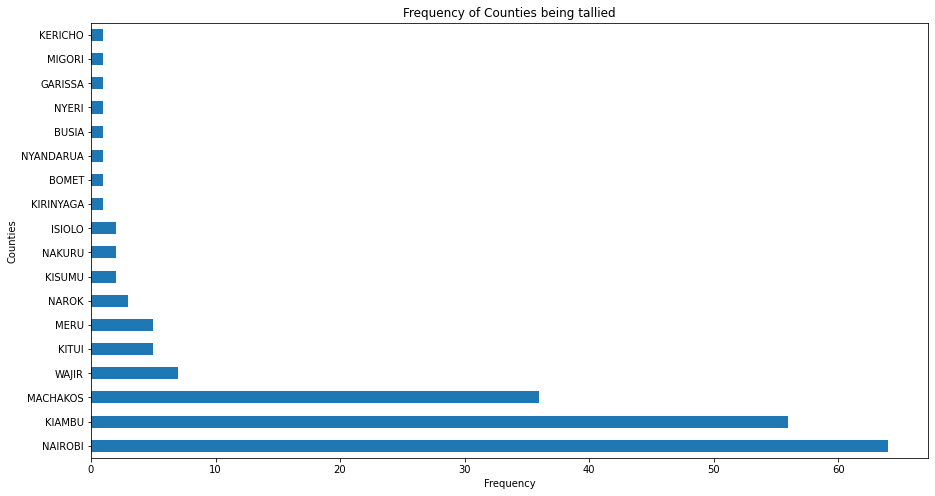

In [ ]:
#Counties talyed
merged_1['COUNTY'].value_counts().plot.barh()
plt.title("Frequency of Counties being tallied")
plt.xlabel('Frequency')
plt.ylabel('Counties')
plt.show()

# merged_1['COUNTY'].iplot(
#     kind='hist',
#     bins=100,
#     xTitle='price',
#     linecolor='black',
#     yTitle='count',
#     title='Histogram of Sale Price')

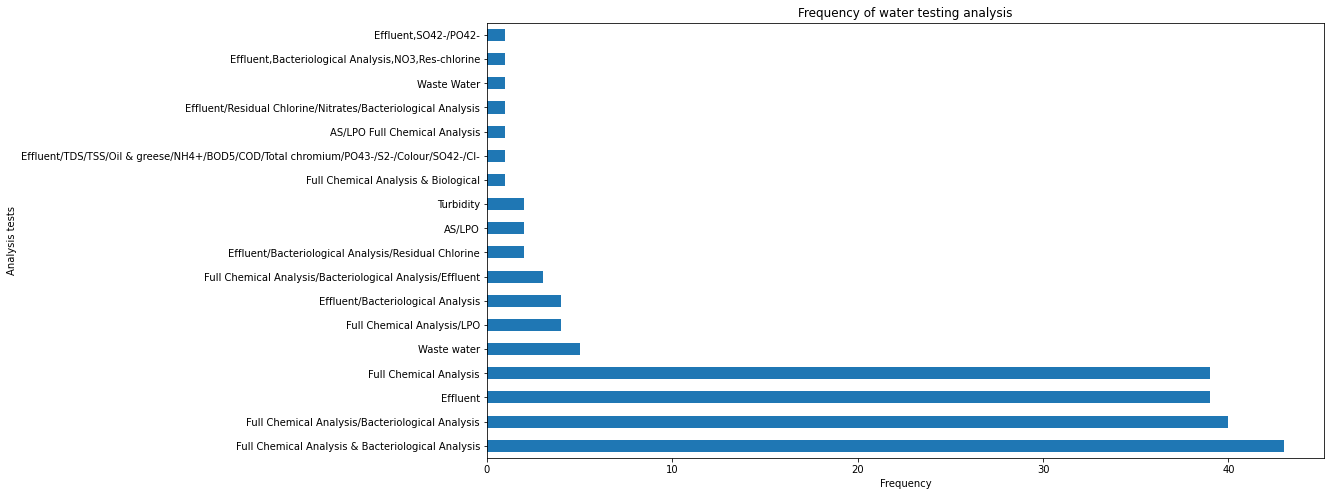

In [ ]:
# types of analysis used
merged_1['TYPE_OF_ANALYSIS'].value_counts().plot.barh()
plt.title("Frequency of water testing analysis")
plt.xlabel('Frequency')
plt.ylabel('Analysis tests')
plt.show() 

The most commonn analysis test is the Full chemical analysis and bacteriological analysis

#### Scatter plots analysis on water components

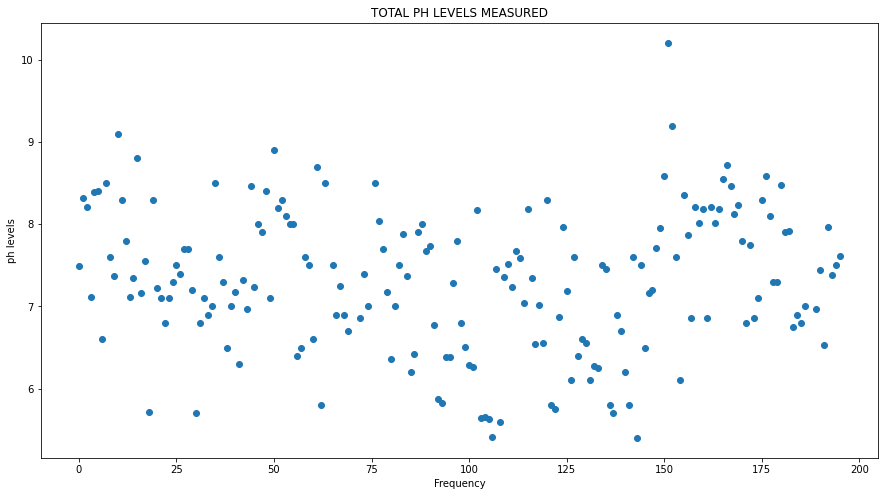

In [ ]:
# PH LEVELS
plt.scatter(merged_1.index, merged_1['PH'])
plt.title("TOTAL PH LEVELS MEASURED")
plt.xlabel('Frequency')
plt.ylabel('ph levels')
plt.show()

Water from most sources is slightly basic. From a ph level of 7. to 9

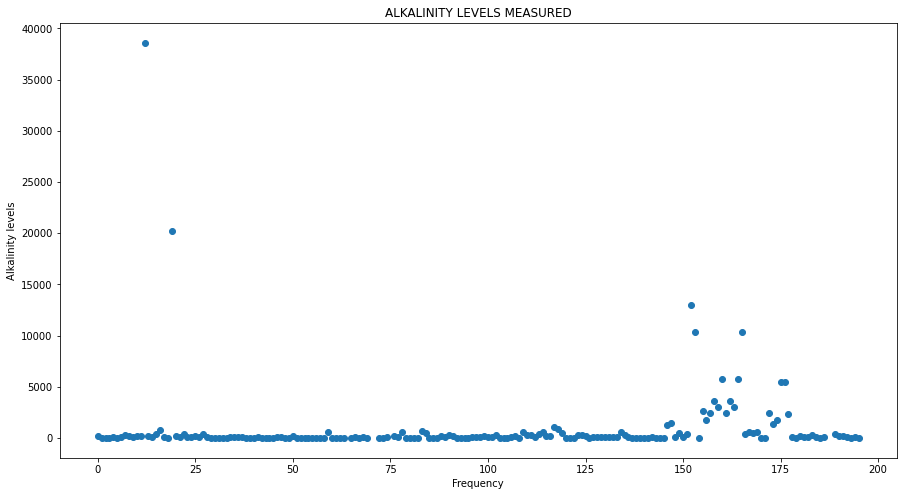

In [ ]:
# ALKALINITY LEVELS
plt.scatter(merged_1.index, merged_1['ALKALINITY_Mg/L'])
plt.title("ALKALINITY LEVELS MEASURED")
plt.xlabel('Frequency')
plt.ylabel('Alkalinity levels')
plt.show()

The most alkalinity levels are below 1000 Mg/L

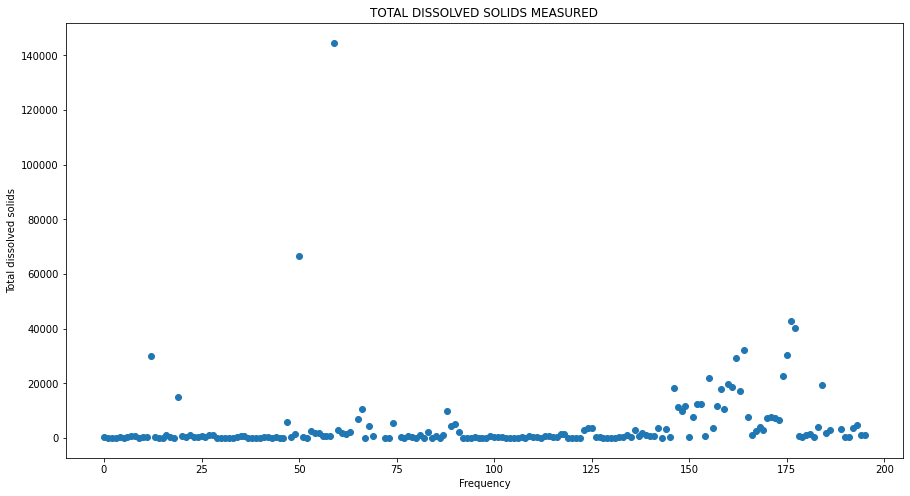

In [ ]:
# TOTAL DISSOLVED SOLIDS ALKALINITY LEVELS
plt.scatter(merged_1.index, merged_1['Total_Dissolved_Solids'])
plt.title("TOTAL DISSOLVED SOLIDS MEASURED")
plt.xlabel('Frequency')
plt.ylabel('Total dissolved solids')
plt.show()

Most dissolved solids' levels are below 1000 

### B. BIVARIATE ANALYSIS

#### Box Plots

In [ ]:
merged_1.columns

Index(['TYPE_OF_H2O', 'COUNTY', 'TYPE_OF_ANALYSIS', 'PH', 'ALKALINITY_Mg/L',
       'Total_Dissolved_Solids', 'Total Population in Service Area',
       'Total PopulationServed', 'Non-Revenue Water (%)',
       'Production per capita (l/c/d)', 'Consumption per capita (l/c/d)'],
      dtype='object')

Text(0, 0.5, 'ALKALINITY')

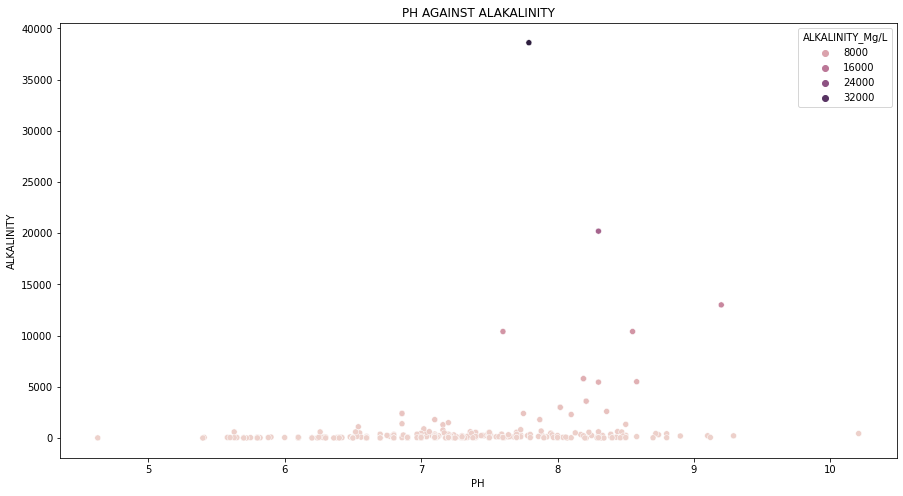

In [ ]:
sns.scatterplot(data=df_water_test, x='PH', y='ALKALINITY_Mg/L', hue='ALKALINITY_Mg/L')
plt.title('PH AGAINST ALAKALINITY')
plt.xlabel('PH')
plt.ylabel('ALKALINITY')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



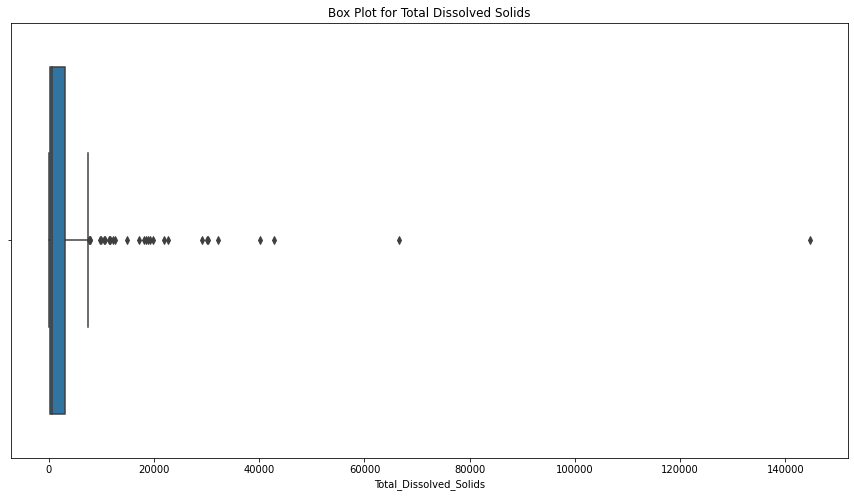

In [ ]:
# PH
sns.boxplot(merged_1['Total_Dissolved_Solids'])
plt.title("Box Plot for Total Dissolved Solids")
plt.show()

In [ ]:
new_data = merged_1[['PH',
       'ALKALINITY_Mg/L', 'Total_Dissolved_Solids',
       'Total Population in Service Area', 'Total PopulationServed',
       'Non-Revenue Water (%)', 'Production per capita (l/c/d)',
       'Consumption per capita (l/c/d)']].copy()

new_data

,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d)
0,7.49,230.0,514.0,4249604.0,3426434.0,38.0,145.0,50.0
1,8.32,6.0,9.0,4249604.0,3426434.0,38.0,145.0,50.0
2,8.21,2.0,9.2,4249604.0,3426434.0,38.0,145.0,50.0
3,7.11,22.0,63.0,4249604.0,3426434.0,38.0,145.0,50.0
4,8.39,130.0,256.0,4249604.0,3426434.0,38.0,145.0,50.0
...,...,...,...,...,...,...,...,...
191,6.53,160.0,210.0,18603.0,11720.0,55.0,175.0,13.0
192,7.97,56.0,3730.0,18603.0,11720.0,55.0,175.0,13.0
193,7.38,28.0,4660.0,18603.0,11720.0,55.0,175.0,13.0
194,7.50,56.0,990.0,18603.0,11720.0,55.0,175.0,13.0


In [ ]:
# Removing outliers
#find absolute value of z-score for each observation

z = np.abs(stats.zscore(new_data))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = new_data[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape


(180, 8)

In [ ]:
data_clean

,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d)
0,7.49,230.0,514.0,4249604.0,3426434.0,38.0,145.0,50.0
1,8.32,6.0,9.0,4249604.0,3426434.0,38.0,145.0,50.0
2,8.21,2.0,9.2,4249604.0,3426434.0,38.0,145.0,50.0
3,7.11,22.0,63.0,4249604.0,3426434.0,38.0,145.0,50.0
4,8.39,130.0,256.0,4249604.0,3426434.0,38.0,145.0,50.0
...,...,...,...,...,...,...,...,...
191,6.53,160.0,210.0,18603.0,11720.0,55.0,175.0,13.0
192,7.97,56.0,3730.0,18603.0,11720.0,55.0,175.0,13.0
193,7.38,28.0,4660.0,18603.0,11720.0,55.0,175.0,13.0
194,7.50,56.0,990.0,18603.0,11720.0,55.0,175.0,13.0


In [ ]:
#find Q1, Q3, and interquartile range for each column
Q1 = new_data.quantile(q=.25)
Q3 = new_data.quantile(q=.75)
IQR = new_data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean_2 = new_data[~((new_data < (Q1-1.5*IQR)) | (new_data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean_2.shape

(132, 8)

In [ ]:
# checking for columns 
data_clean_2.columns

Index(['PH', 'ALKALINITY_Mg/L', 'Total_Dissolved_Solids',
       'Total Population in Service Area', 'Total PopulationServed',
       'Non-Revenue Water (%)', 'Production per capita (l/c/d)',
       'Consumption per capita (l/c/d)'],
      dtype='object')

### C. MULTIVARIATE ANALYSIS

#### histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58abc9f790>,
      dtype=object)

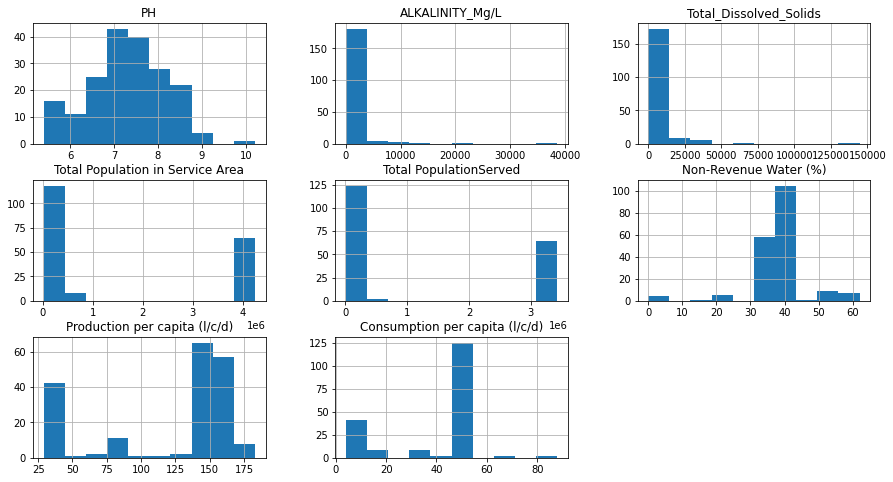

In [ ]:
merged_1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58ab916750>,
      dtype=object)

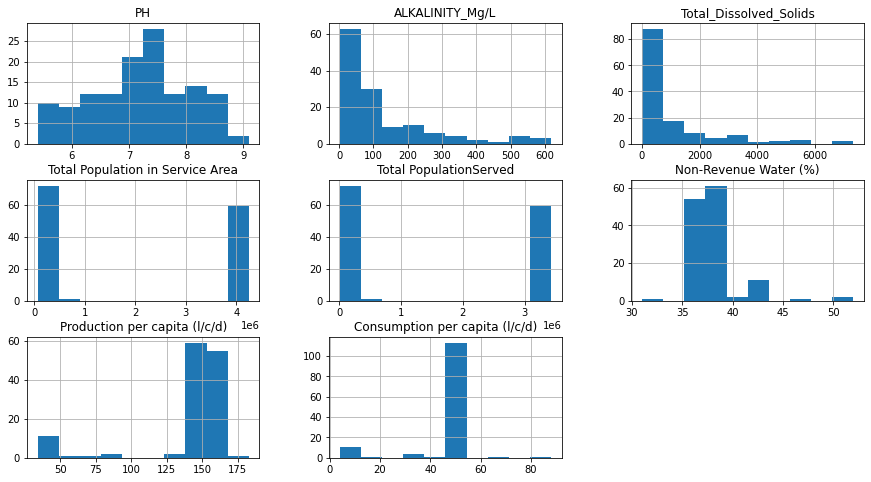

In [ ]:
data_clean_2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58ab516290>]],
      dtype=object)

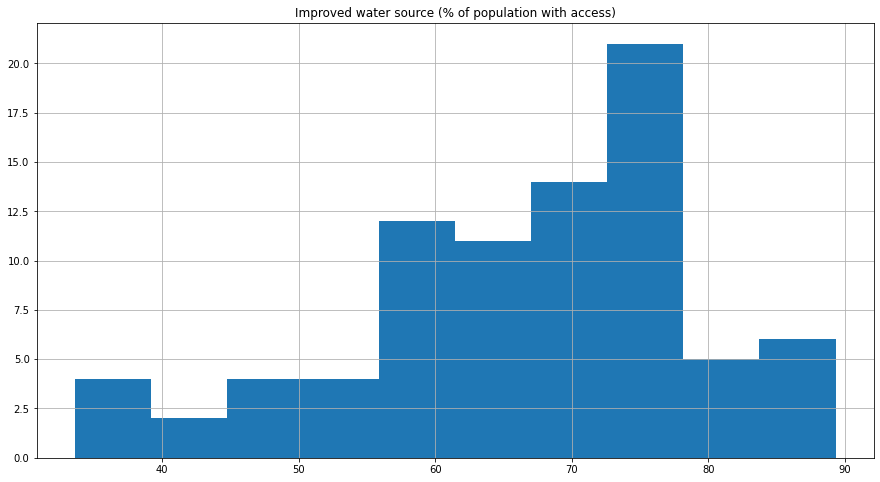

In [ ]:
merged_2.hist()

### Pair Plot

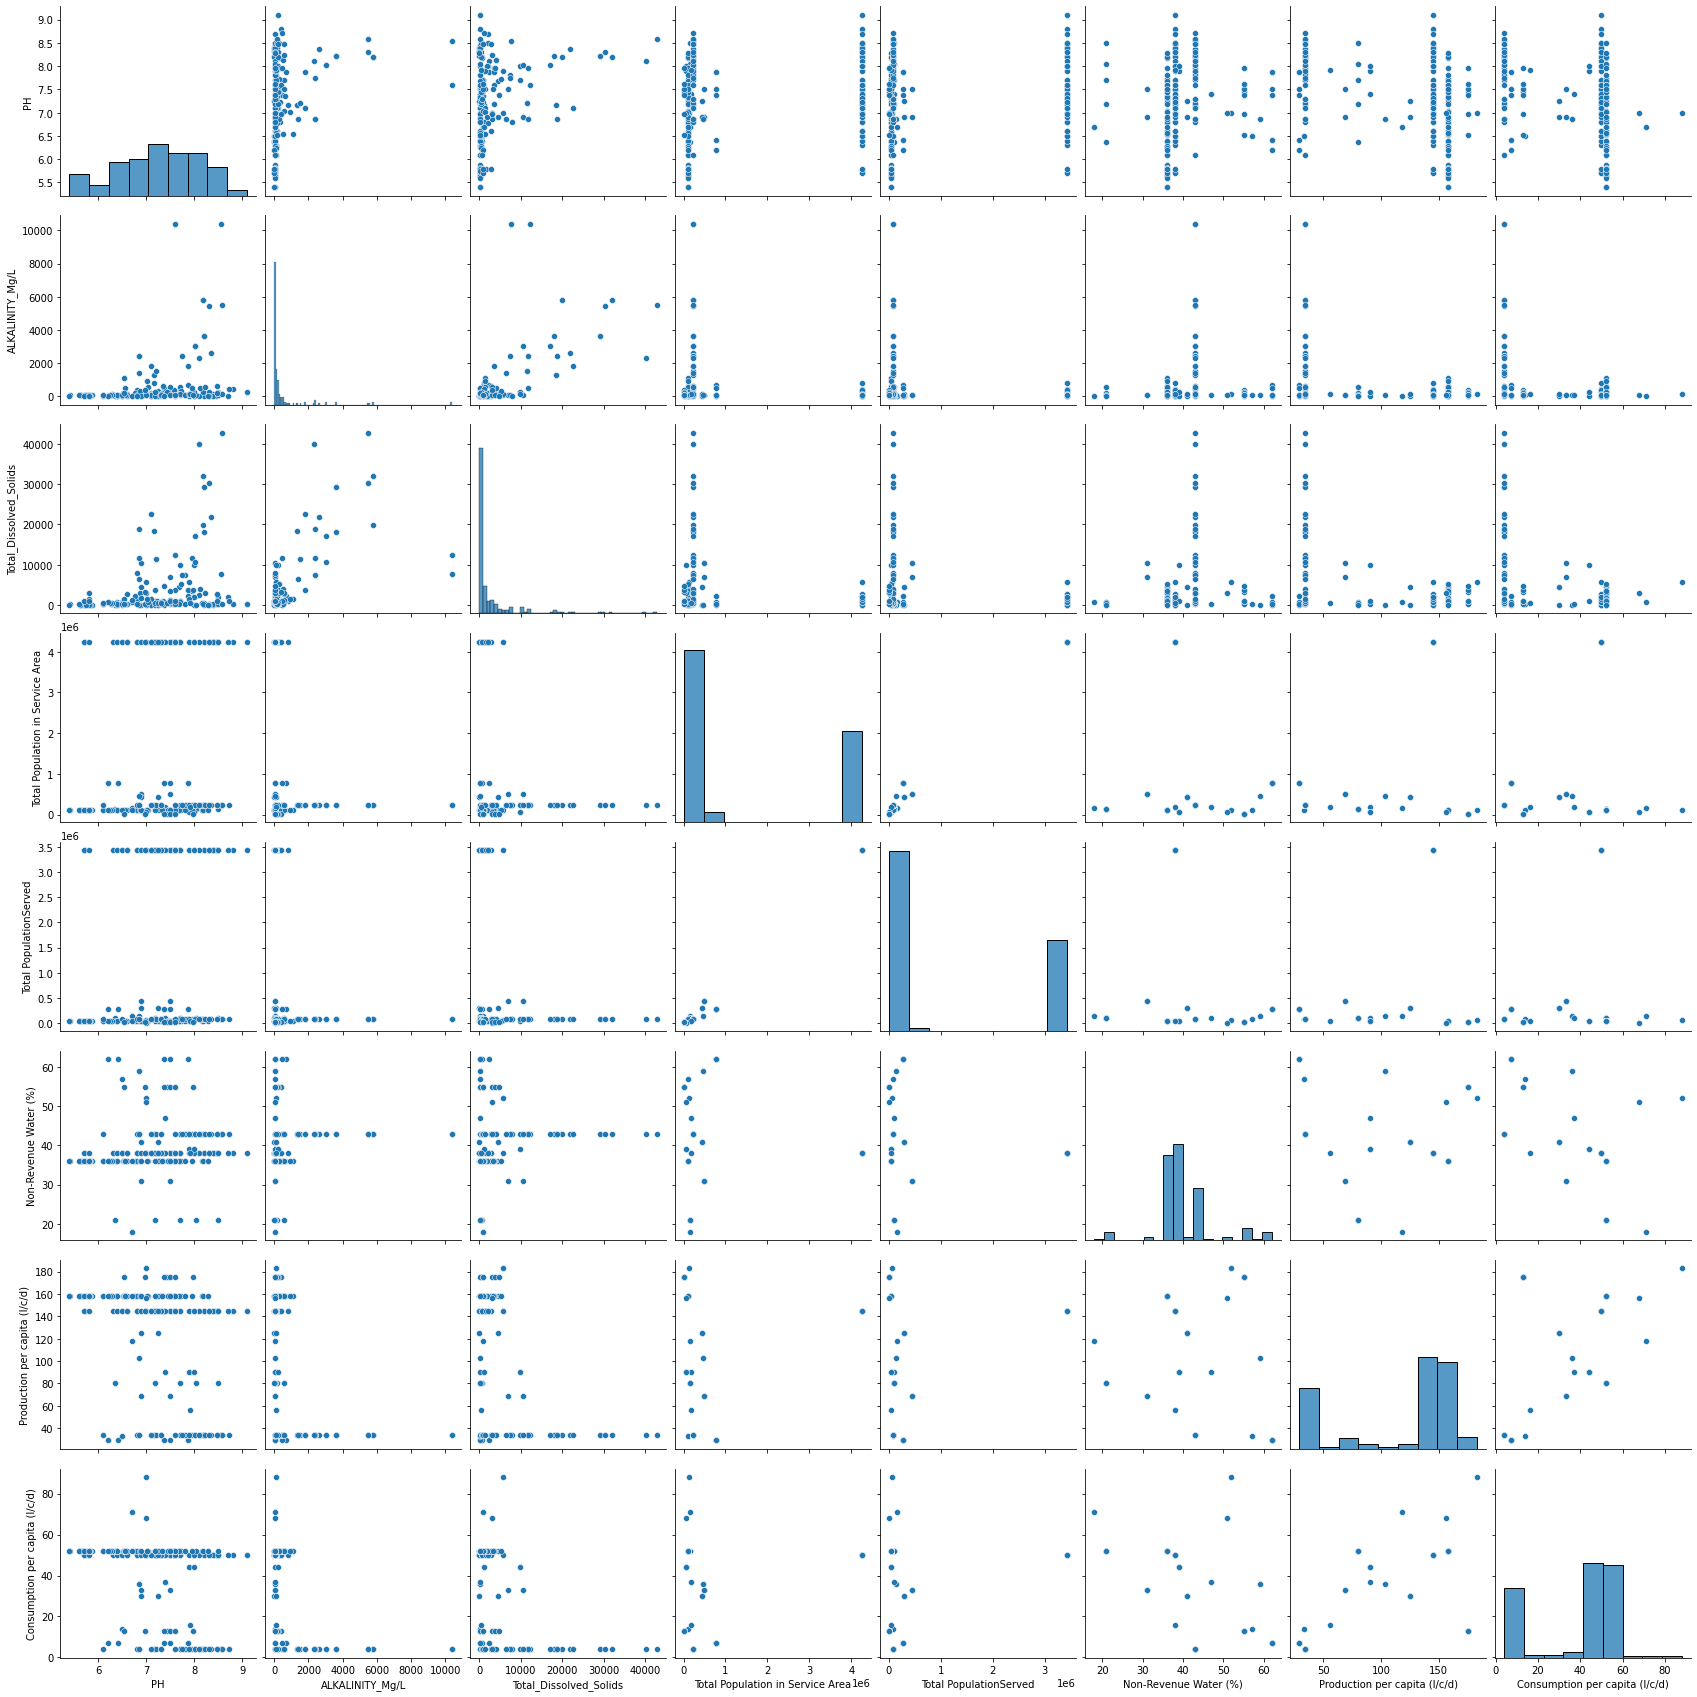

In [ ]:
# pair plot
sns.pairplot(data_clean,height=3)
plt.show()

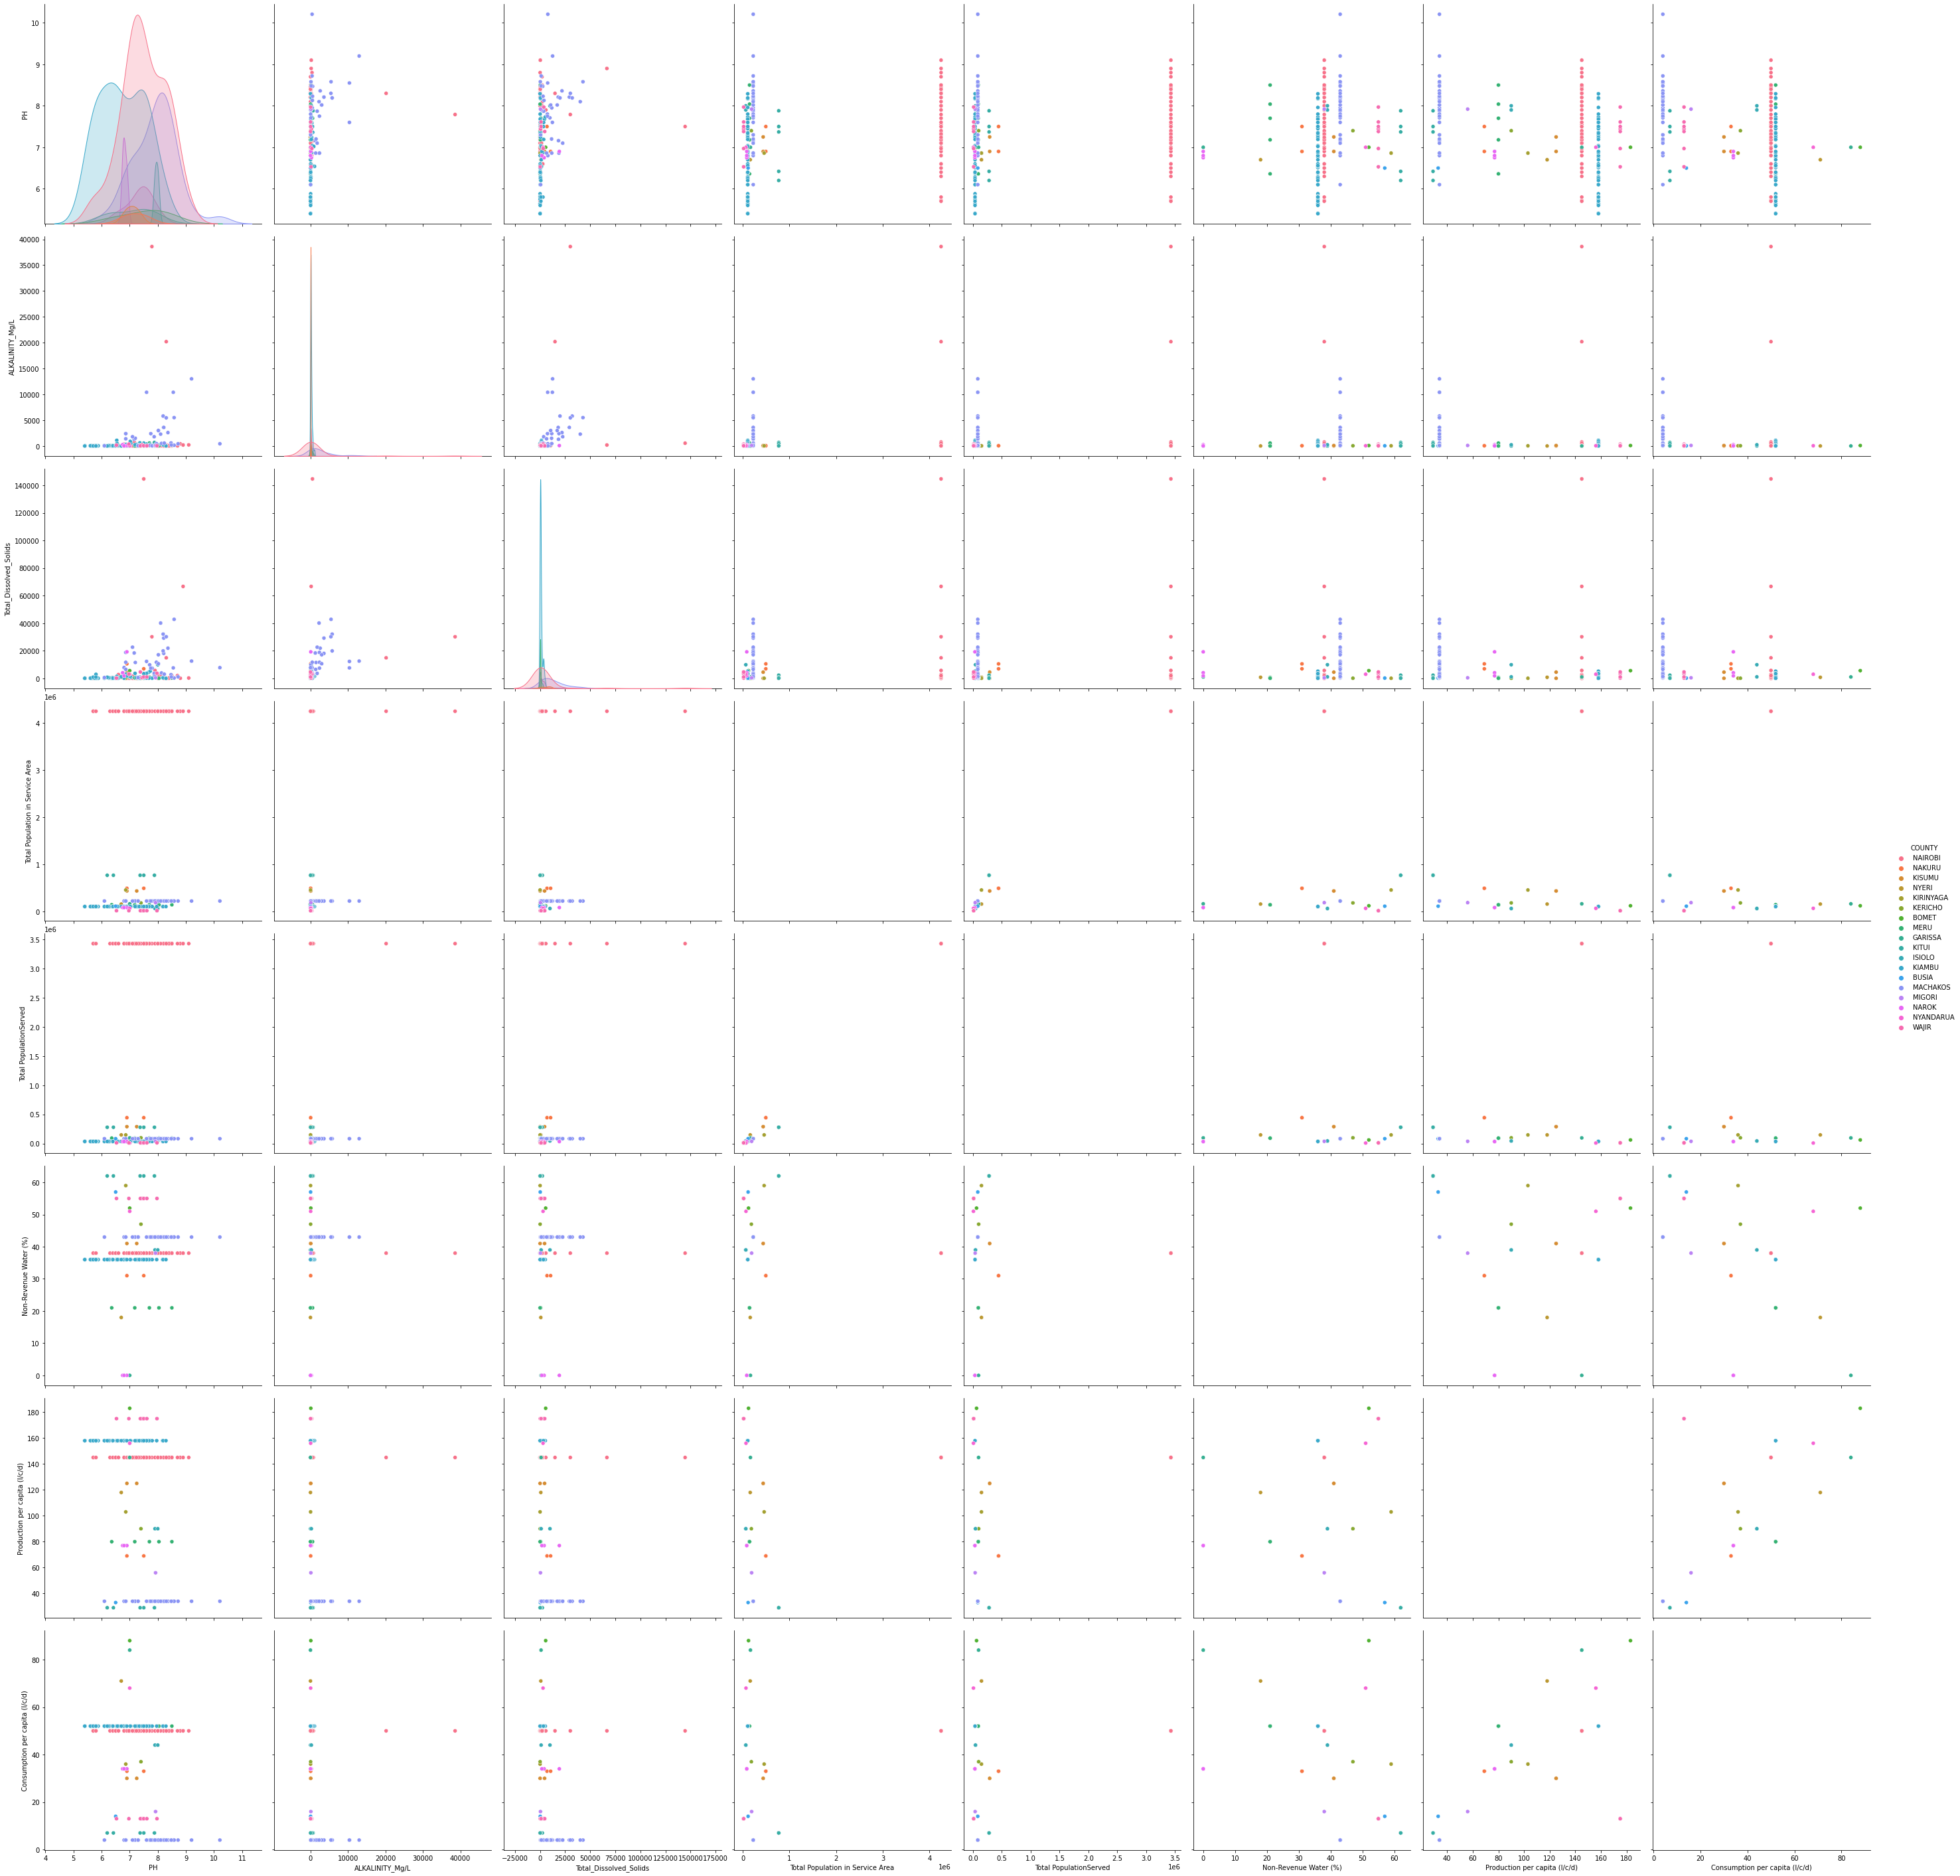

In [ ]:
# pair plot
sns.pairplot(merged_1, hue="COUNTY",height=5)
plt.show()

#### Correlation map

In [ ]:
datas_corr = data_clean_2.iloc[:,3:]

datas_corr

,Total Population in Service Area,Total PopulationServed,Non-Revenue Water (%),Production per capita (l/c/d),Consumption per capita (l/c/d)
0,4249604.0,3426434.0,38.0,145.0,50.0
1,4249604.0,3426434.0,38.0,145.0,50.0
2,4249604.0,3426434.0,38.0,145.0,50.0
3,4249604.0,3426434.0,38.0,145.0,50.0
4,4249604.0,3426434.0,38.0,145.0,50.0
...,...,...,...,...,...
179,224162.0,83333.0,43.0,34.0,4.0
180,224162.0,83333.0,43.0,34.0,4.0
181,224162.0,83333.0,43.0,34.0,4.0
182,189602.0,37641.0,38.0,56.0,16.0


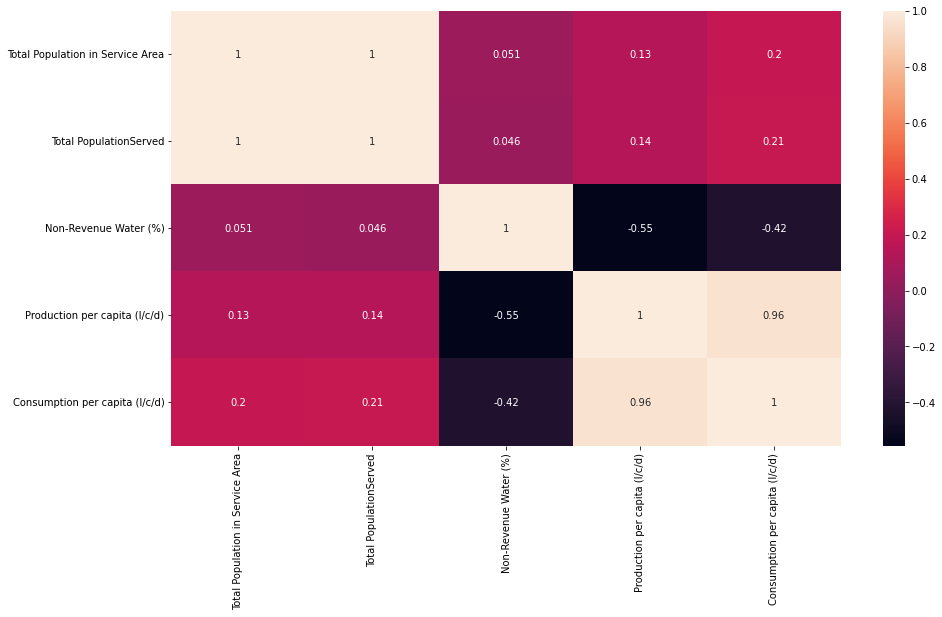

In [ ]:
#ploting the heatmap for correlation

ax = sns.heatmap(datas_corr.corr(), annot=True)

# Q1 : What are the different sources of water across various counties in Kenya?

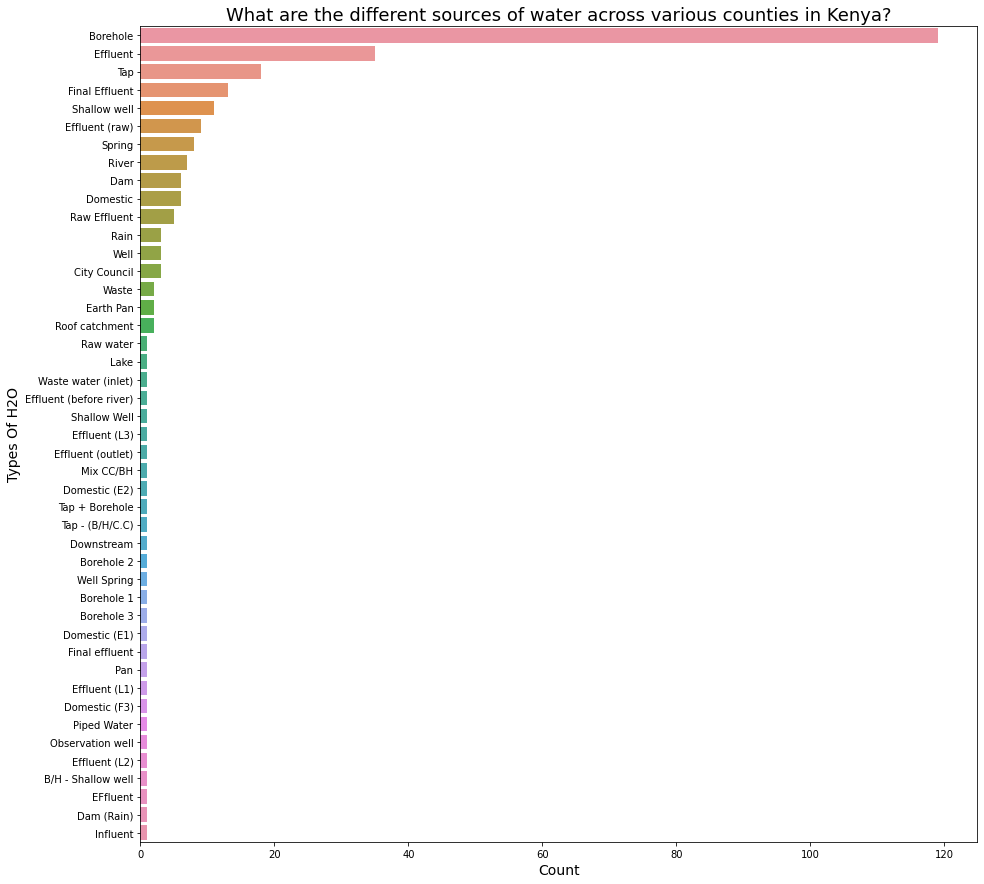

In [ ]:
# Analysis Questions

## What are the different sources of water across various counties in Kenya?
plt.subplots(figsize=(15, 15))
ax = sns.barplot(x=df_water_test['TYPE_OF_H2O'].value_counts(), y=df_water_test['TYPE_OF_H2O'].value_counts().index)
ax.set_ylabel('Types Of H2O',fontsize=14)
ax.set_xlabel('Count',fontsize=14)

plt.title("What are the different sources of water across various counties in Kenya?",fontsize=18)
plt.show()

###### Observations

From our Analysis Question *1* 

**What are the different sources of water across various counties in Kenya?**

> We see that Boreholes,Effluents and Taps are the most used methods of sourcing water in most counties



> 

# Q2: What is the percentage of people with access to improved water facilities?

In [ ]:
merged_2.head()

,COUNTY,Improved water source (% of population with access),WaterPaid
0,NAIROBI,83.1,No
1,NAIROBI,83.1,Sometimes
2,NAIROBI,83.1,Yes
3,MANDERA,51.9,Yes
4,MANDERA,51.9,No


In [ ]:
df_perc_access_wtr.head()

,COUNTY,Improved water source (% of population with access)
0,National Average,66.5
1,Baringo,35.1
2,Bomet,40.8
3,Bungoma,88.9
4,Busia,82.9


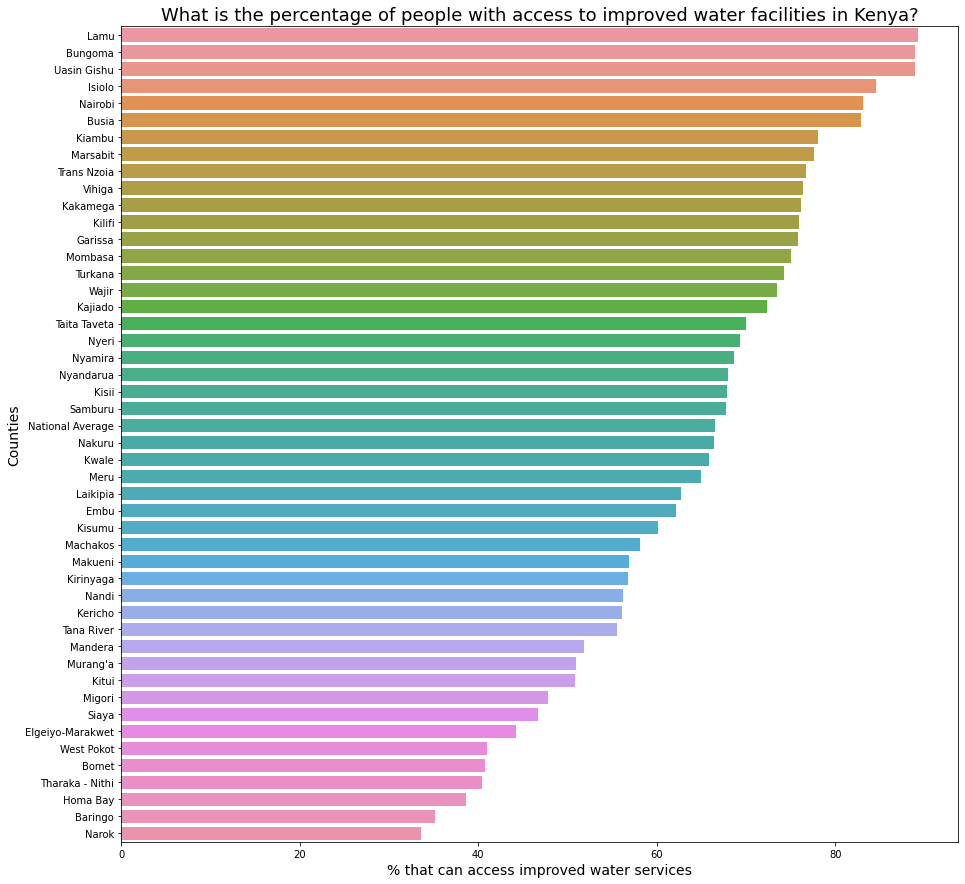

In [ ]:
# plotting a bar plot for this task
ORDER = df_perc_access_wtr.sort_values('Improved water source (% of population with access)',ascending=False).COUNTY
plt.subplots(figsize=(15, 15))
ax = sns.barplot(x=df_perc_access_wtr['Improved water source (% of population with access)'], y=df_perc_access_wtr['COUNTY'],order=ORDER)
ax.set_xlabel('% that can access improved water services',fontsize=14)
ax.set_ylabel('Counties',fontsize=14)

plt.title("What is the percentage of people with access to improved water facilities in Kenya?",fontsize=18)
plt.show()

###### Observations

From our Analysis Question *2* 

**What is the percentage of people with access to improved water facilities in Kenya?**

> Lamu has the highest percentage of people that can access improved water services whie Narok has the least.



#Q3: What is the level of dissolved solids in the water for each county?


In [ ]:
df_water_test.head()

,TYPE_OF_H2O,COUNTY,TYPE_OF_ANALYSIS,PH,ALKALINITY_Mg/L,Total_Dissolved_Solids
0,Effluent,Machakos,Effluent,7.16,1300.0,18401.0
1,Effluent,Machakos,Effluent,7.20,1500.0,11507.0
2,Borehole,Mogadishu,Full Chemical Analysis,7.78,236.0,1729.8
3,River,Central,Full Chemical Analysis,8.00,98.0,201.5
4,Borehole,Lokichoggio,Full Chemical Analysis,7.08,256.0,469.0


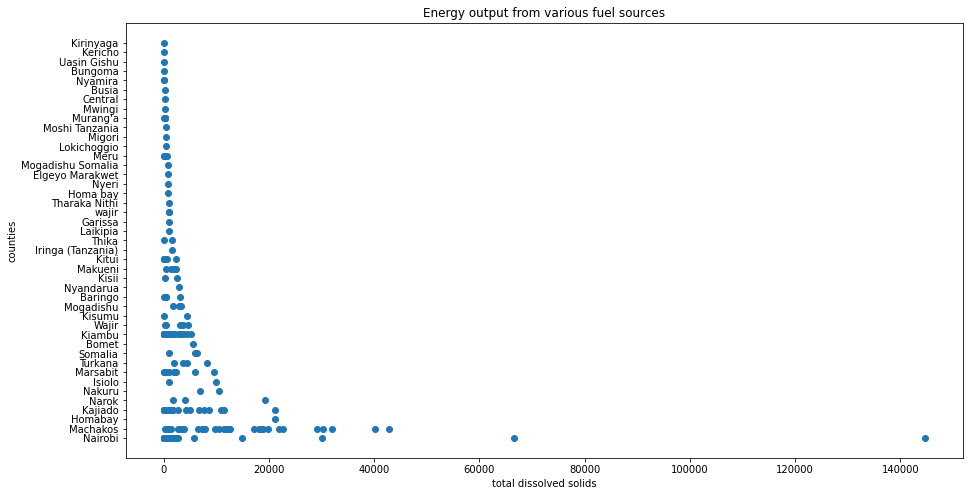

In [ ]:
#y=df_water_test['Total_Dissolved_Solids']
y=df_water_test['COUNTY']
x= df_water_test.sort_values('Total_Dissolved_Solids',ascending=False)
df_sorted_desc=df_water_test.sort_values('Total_Dissolved_Solids',ascending=False)

plt.scatter('Total_Dissolved_Solids','COUNTY',data=df_sorted_desc)
plt.ylabel("counties")
plt.xlabel("total dissolved solids")
plt.title("Energy output from various fuel sources")

plt.show()

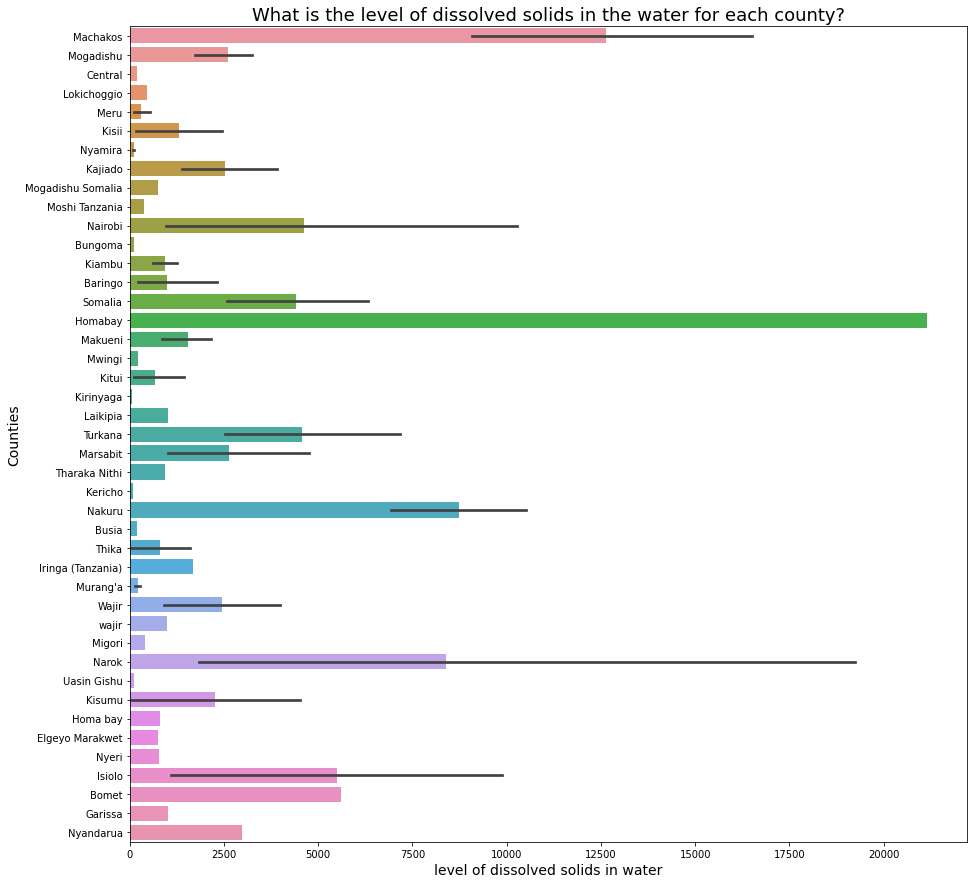

In [ ]:
#plotting a bar plot 
ORDER = df_water_test.sort_values('Total_Dissolved_Solids',ascending=False).COUNTY
plt.subplots(figsize=(15, 15))
ax = sns.barplot(x=df_water_test['Total_Dissolved_Solids'], y=df_water_test['COUNTY'])
ax.set_xlabel('level of dissolved solids in water',fontsize=14)
ax.set_ylabel('Counties',fontsize=14)

plt.title("What is the level of dissolved solids in the water for each county?",fontsize=18)
plt.show()

Homabay has the highest level of dissolved solids in their water while Kirinyaga has the lowest

#Q4: Which counties have the safest water for consumption and daily use?


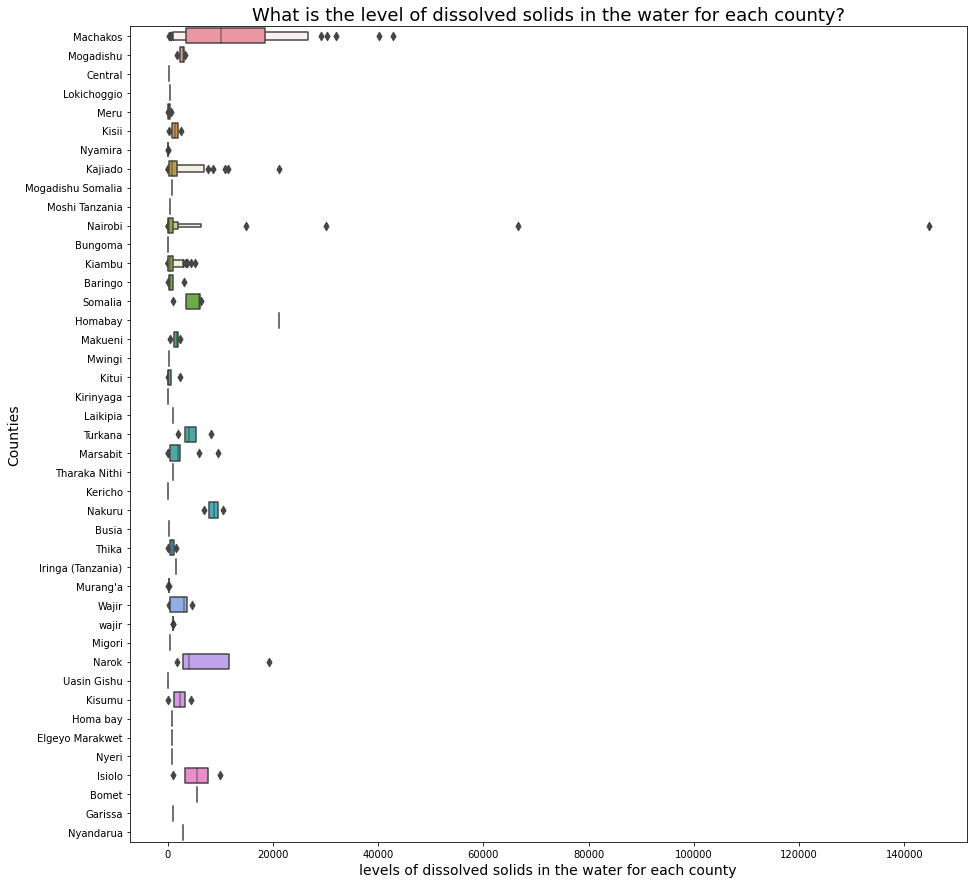

In [ ]:
ORDER = df_water_test.sort_values('Total_Dissolved_Solids',ascending=False).COUNTY
plt.subplots(figsize=(15, 15))
ax = sns.boxenplot(x=df_water_test['Total_Dissolved_Solids'], y=df_water_test['COUNTY'])
ax.set_xlabel('levels of dissolved solids in the water for each county',fontsize=14)
ax.set_ylabel('Counties',fontsize=14)

plt.title("What is the level of dissolved solids in the water for each county?",fontsize=18)
plt.show()

#Q5: Which counties have the highest levels of water contamination?

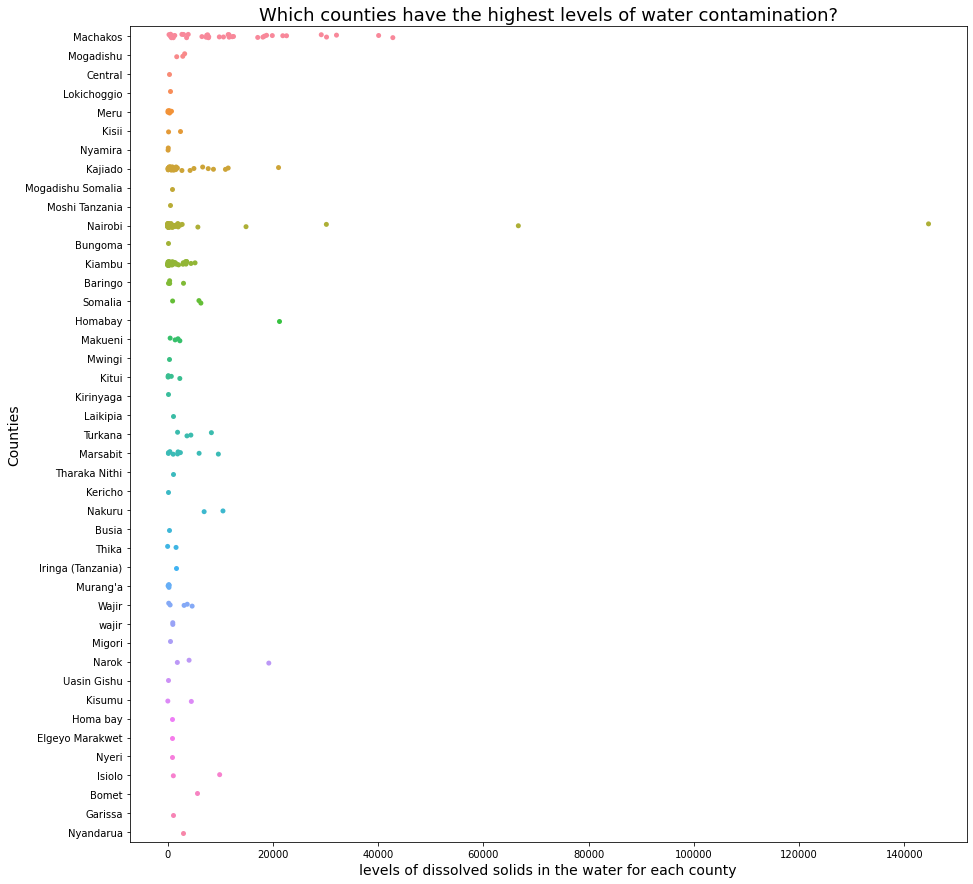

In [ ]:
contamination = df_water_test.sort_values('Total_Dissolved_Solids',ascending=False).COUNTY
plt.subplots(figsize=(15, 15))
ax = sns.stripplot(x=df_water_test['Total_Dissolved_Solids'], y=df_water_test['COUNTY'])
ax.set_xlabel('levels of dissolved solids in the water for each county',fontsize=14)
ax.set_ylabel('Counties',fontsize=14)

plt.title('Which counties have the highest levels of water contamination?', fontsize=18)
plt.show()

Nairobi has the highest level of contaminaton followed by Machakos

# Hypotheses statement
#### Null Hypothesis = HO
#### Alternative Hypothesis = HA


## Hypothesis 1
### HO: Most counties in Kenya source their water from taps
### HA: Most counties in Kenya do not source their water from taps

#Hypothesis1
###HO: Average ph of the type of water in Kenya is alkaline
###HO: Average ph of the type of water in Kenya is not alkaline

In [ ]:
len(df_water_test)

280

first we test for normality


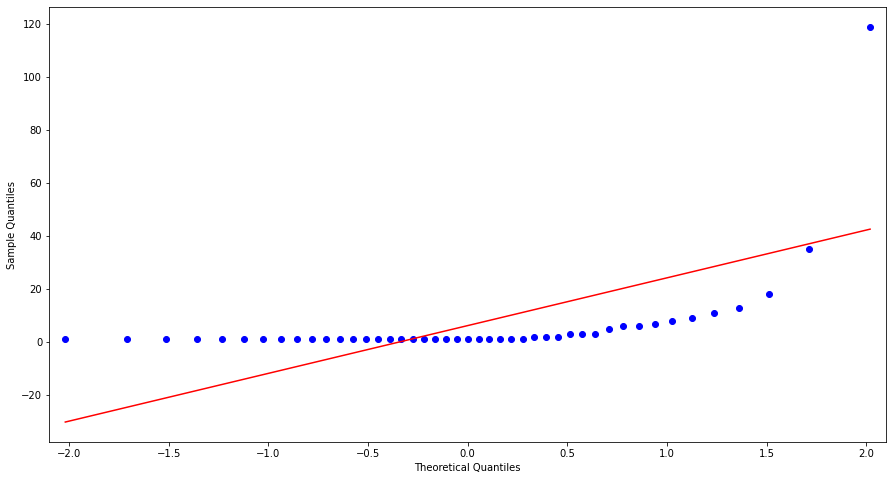

In [ ]:
qqplot(df_water_test['TYPE_OF_H2O'].value_counts(), line='s')
pyplot.show()

In [ ]:
# lets check for the sum of value counts and number of values in the column
a=df_water_test['PH'].sum()
b=len(df_water_test['PH'])
print(b)
print(a)

280
2042.8200000000002


In [ ]:
 # finding the mean std mode variance kurtosis skewness
 print(df_water_test['PH'].mean())
 print(df_water_test['PH']).median

7.295785714285716
0      7.16
1      7.20
2      7.78
3      8.00
4      7.08
       ... 
275    5.80
276    8.80
277    7.10
278    7.30
279    8.50
Name: PH, Length: 280, dtype: float64


AttributeError: ignored

since we have one sample that is not a normal distribution, we use wilcoxon signed rank procedure to test for the p value

In [ ]:
from scipy.stats import wilcoxon

w,p = wilcoxon(df_water_test['PH'], alternative='greater')
w,p
print(w,p)

# confidence level = alpha
alpha = 0.05
if p > alpha:
  print('We reject the null hypothesis that the Average ph of the type of water in Kenya is alkaline')
else:
  print('We accept the null hypothesis that the Average ph of the type of water in Kenya is alkaline')

39340.0 5.65031795591325e-48
We accept the null hypothesis that the Average ph of the type of water in Kenya is alkaline
